In [1]:

import os
import matplotlib 
import matplotlib.pyplot as plt

# Load standard libs
import sys
import pandas as pd

# Load custom code (keep it that way for debugging)
sys.path.append(os.path.join(os.getcwd(), "..", "neuroencoders"))
from utils.global_classes import Params, Project, save_project_to_pickle
from utils.global_classes import DataHelper as DataHelperClass
from importData import rawdata_parser
from resultAnalysis import print_results
from transformData.linearizer import UMazeLinearizer
from utils import management, MOBS_Functions
from fullEncoder import an_network as Training
from importData.juliaData.julia_data_parser import julia_spike_filter
from openEphysExport.generate_json import generate_json
import numpy as np
from importlib import reload
from importData import epochs_management as ep

2025-08-18 15:10:07.650296: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-18 15:10:07.650350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-18 15:10:07.651756: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.


In [2]:
%load_ext autoreload  
%autoreload 2

In [3]:
nameExp = "current_LogLoss_Transformer_Dense_Transformer"
nameExp_Transformer = "current_LogLoss_Transformer_Dense_Transformer"
nameExp_LSTM = "current_LogLoss_Transformer_Dense_LSTM"

In [4]:
jsonPath = None
windowSizeMS = [108, 252]
mode = "ann"
target = "pos"
phase = "pre"
nEpochs = 200 
mouse = "1199"
manipe = "PAG"

In [5]:
from utils.MOBS_Functions import path_for_experiments_df


Dir = path_for_experiments_df('Sub', nameExp)
Dir_Transformer = path_for_experiments_df('Sub', nameExp_Transformer)
Dir_LSTM = path_for_experiments_df('Sub', nameExp_LSTM)

/home/theodechrn/Documents/Cours/phd/neuroEncoders/neuroencoders/utils/PathForExperiments.py:199: UserWarning: ExpeInfo.mat not found for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1168_MFB/ExpeInfo.mat
  warnings.warn(f"ExpeInfo.mat not found for {expe_info_file}")
/home/theodechrn/Documents/Cours/phd/neuroEncoders/neuroencoders/utils/PathForExperiments.py:199: UserWarning: ExpeInfo.mat not found for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1186_MFB/ExpeInfo.mat
  warnings.warn(f"ExpeInfo.mat not found for {expe_info_file}")
/home/theodechrn/Documents/Cours/phd/neuroEncoders/neuroencoders/utils/PathForExperiments.py:199: UserWarning: ExpeInfo.mat not found for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_MFB/ExpeInfo.mat
  warnings.warn(f"ExpeInfo.mat not found for {expe_info_file}")
/home/theodechrn/Documents/Cours/phd/neuroEncoders/neuroencoders/utils/PathForExperiments.py:199: UserWarning: ExpeInfo.mat not found

## mobs_function

In [6]:
Mouse_Results = MOBS_Functions.Mouse_Results(Dir, mouse_name=mouse, manipe=manipe, target=target, 
                                                        nameExp=nameExp, nEpochs=nEpochs, phase=phase, 
                                                        deviceName="cpu", windows=windowSizeMS,
                                                        isTransformer = "LSTM" not in nameExp, denseweight= True, 
                                                        transform_w_log = True,
                                                        which = "both",
                                                        isPredLoss = False
                                                        )

Path for 1199 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows found for 1199: ['108', '252']
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before


/home/theodechrn/Documents/Cours/phd/neuroEncoders/notebooks/../neuroencoders/utils/MOBS_Functions.py:805: UserWarning: Failed to load project for window 108 with error: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/current_LogLoss_Transformer_Dense_Transformer/Project_108.pkl/Project_108.pkl'. Creating new Project and DataHelper.
  warn(
/home/theodechrn/Documents/Cours/phd/neuroEncoders/.venv/lib/python3.11/site-packages/tables/attributeset.py:322: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/theodechrn/Documents/Cours/phd/neuroEncoders/.venv/lib/python3.11/site-packages/tables/attributeset.py:322: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/theodechrn/Documents/Cours/phd/neuroEncoders/notebo

Using Transformer architecture !
Applying Dynamic Dense Loss reweighting...
Reading saved cluster csv file


100%|██████████| 4/4 [00:08<00:00,  2.08s/it]


finished reading
Using Transformer architecture !
Applying Dynamic Dense Loss reweighting...
======================M1199=======================
Mouse_Results for 1199 (PAG)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: pre
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows: 108, 252


### play with bayesian trainer

In [7]:
from simpleBayes.decode_bayes import Trainer as BayesTrainer, DecoderConfig

In [8]:
decoders = dict()
bayesmatrices = dict()

In [9]:
Mouse_Results.DataHelper.fullBehavior['Bandwidth']

0.06875096783148096

In [10]:
behaviorData = Mouse_Results.DataHelper.fullBehavior 
from functools import reduce
from importData.epochs_management import inEpochs
speed_filtered_positions = behaviorData["Positions"][
    reduce(
        np.intersect1d,
        (
            np.where(behaviorData["Times"]["speedFilter"]),
            inEpochs(
                behaviorData["positionTime"][:, 0],
                behaviorData["Times"]["trainEpochs"],
            ),
        ),
    )
]  # Get speed-filtered coordinates from train epoch
positions = speed_filtered_positions[
    ~np.isnan(speed_filtered_positions).any(axis=1)
]


In [11]:
# Scott's rule with some adjustment for 2D
n_samples = len(positions)
bandwidth = n_samples ** (-1 / (2 + 4)) * np.std(positions, axis=0)


In [12]:
bandwidth

array([0.06455568, 0.06754653])

In [13]:
print(Mouse_Results.DataHelper.fullBehavior['Bandwidth'], np.mean(bandwidth))

0.06875096783148096 0.06605110363962943


In [17]:
for masking_factor in [5,10,15,20,40]:
    decoder_config = DecoderConfig(masking_factor = masking_factor)
    decoder = BayesTrainer(Mouse_Results.Project, phase = Mouse_Results.phase, config = decoder_config)
    bayesMatrices = decoder.train_order_by_pos(
        behaviorData = Mouse_Results.data_helper["252"].fullBehavior,
        l_function = Mouse_Results.l_function,
        use_linear_tuning=True
    )
    decoders[masking_factor] = decoder
    bayesmatrices[masking_factor] = bayesMatrices

Reading saved cluster csv file


100%|██████████| 4/4 [00:07<00:00,  1.89s/it]
2025-08-18 15:16:11,151 - INFO - Training and ordering neurons by position preference...
2025-08-18 15:16:11,152 - INFO - Starting Bayesian training process...
2025-08-18 15:16:11,158 - INFO - Using adaptive bandwidth: 0.0661 (based on 13743 samples). To be compared with fullBehaviorData['Bandwidth']: 0.0688


finished reading


2025-08-18 15:16:11,739 - INFO - Occupation map regularization factor: 4.9383e-12. before would have been changed by 2.1108954009781115e-06
2025-08-18 15:16:11,739 - INFO - Occupation map: max=0.0014, threshold=0.0003, effective masking of 30.93%
2025-08-18 15:16:11,740 - INFO - Aligning speed-filter with spike times using PyKeops
100%|██████████| 4/4 [05:18<00:00, 79.60s/it]
2025-08-18 15:21:30,132 - INFO - Speed filters aligned successfully
2025-08-18 15:21:30,132 - INFO - Building marginal and local rate functions for 4 tetrodes...
100%|██████████| 4/4 [00:31<00:00,  7.85s/it]
2025-08-18 15:22:01,528 - INFO - Bayesian matrices saved successfully.
2025-08-18 15:22:01,529 - INFO - Training completed successfully.
2025-08-18 15:22:01,529 - INFO - Computing linear tuning curves for ordering...
/home/theodechrn/Documents/Cours/phd/neuroEncoders/notebooks/../neuroencoders/simpleBayes/decode_bayes.py:2470: RuntimeWarning: invalid value encountered in divide
  histTuning = histSpikes / hist

Reading saved cluster csv file


100%|██████████| 4/4 [00:08<00:00,  2.13s/it]
2025-08-18 15:22:16,166 - INFO - Training and ordering neurons by position preference...
2025-08-18 15:22:16,167 - INFO - Starting Bayesian training process...
2025-08-18 15:22:16,174 - INFO - Using adaptive bandwidth: 0.0661 (based on 13743 samples). To be compared with fullBehaviorData['Bandwidth']: 0.0688


finished reading


2025-08-18 15:22:16,749 - INFO - Occupation map regularization factor: 4.9383e-12. before would have been changed by 2.1108954009781115e-06
2025-08-18 15:22:16,750 - INFO - Occupation map: max=0.0014, threshold=0.0001, effective masking of 18.69%
2025-08-18 15:22:16,750 - INFO - Aligning speed-filter with spike times using PyKeops
100%|██████████| 4/4 [05:21<00:00, 80.32s/it]
2025-08-18 15:27:38,012 - INFO - Speed filters aligned successfully
2025-08-18 15:27:38,012 - INFO - Building marginal and local rate functions for 4 tetrodes...
100%|██████████| 4/4 [00:31<00:00,  7.85s/it]
2025-08-18 15:28:09,450 - INFO - Bayesian matrices saved successfully.
2025-08-18 15:28:09,451 - INFO - Training completed successfully.
2025-08-18 15:28:09,451 - INFO - Computing linear tuning curves for ordering...
/home/theodechrn/Documents/Cours/phd/neuroEncoders/notebooks/../neuroencoders/simpleBayes/decode_bayes.py:2470: RuntimeWarning: invalid value encountered in divide
  histTuning = histSpikes / hist

Reading saved cluster csv file


100%|██████████| 4/4 [00:09<00:00,  2.42s/it]
2025-08-18 15:28:25,224 - INFO - Training and ordering neurons by position preference...
2025-08-18 15:28:25,224 - INFO - Starting Bayesian training process...
2025-08-18 15:28:25,230 - INFO - Using adaptive bandwidth: 0.0661 (based on 13743 samples). To be compared with fullBehaviorData['Bandwidth']: 0.0688


finished reading


2025-08-18 15:28:25,811 - INFO - Occupation map regularization factor: 4.9383e-12. before would have been changed by 2.1108954009781115e-06
2025-08-18 15:28:25,812 - INFO - Occupation map: max=0.0014, threshold=0.0001, effective masking of 15.24%
2025-08-18 15:28:25,812 - INFO - Aligning speed-filter with spike times using PyKeops
100%|██████████| 4/4 [05:30<00:00, 82.71s/it]
2025-08-18 15:33:56,669 - INFO - Speed filters aligned successfully
2025-08-18 15:33:56,669 - INFO - Building marginal and local rate functions for 4 tetrodes...
100%|██████████| 4/4 [00:31<00:00,  7.99s/it]
2025-08-18 15:34:28,647 - INFO - Bayesian matrices saved successfully.
2025-08-18 15:34:28,647 - INFO - Training completed successfully.
2025-08-18 15:34:28,648 - INFO - Computing linear tuning curves for ordering...
/home/theodechrn/Documents/Cours/phd/neuroEncoders/notebooks/../neuroencoders/simpleBayes/decode_bayes.py:2470: RuntimeWarning: invalid value encountered in divide
  histTuning = histSpikes / hist

Reading saved cluster csv file


100%|██████████| 4/4 [00:09<00:00,  2.44s/it]
2025-08-18 15:34:45,247 - INFO - Training and ordering neurons by position preference...
2025-08-18 15:34:45,247 - INFO - Starting Bayesian training process...
2025-08-18 15:34:45,254 - INFO - Using adaptive bandwidth: 0.0661 (based on 13743 samples). To be compared with fullBehaviorData['Bandwidth']: 0.0688


finished reading


2025-08-18 15:34:45,809 - INFO - Occupation map regularization factor: 4.9383e-12. before would have been changed by 2.1108954009781115e-06
2025-08-18 15:34:45,810 - INFO - Occupation map: max=0.0014, threshold=0.0001, effective masking of 13.32%
2025-08-18 15:34:45,810 - INFO - Aligning speed-filter with spike times using PyKeops
100%|██████████| 4/4 [05:35<00:00, 83.78s/it]
2025-08-18 15:40:20,945 - INFO - Speed filters aligned successfully
2025-08-18 15:40:20,945 - INFO - Building marginal and local rate functions for 4 tetrodes...
100%|██████████| 4/4 [00:31<00:00,  7.99s/it]
2025-08-18 15:40:52,928 - INFO - Bayesian matrices saved successfully.
2025-08-18 15:40:52,928 - INFO - Training completed successfully.
2025-08-18 15:40:52,929 - INFO - Computing linear tuning curves for ordering...
/home/theodechrn/Documents/Cours/phd/neuroEncoders/notebooks/../neuroencoders/simpleBayes/decode_bayes.py:2470: RuntimeWarning: invalid value encountered in divide
  histTuning = histSpikes / hist

Reading saved cluster csv file


100%|██████████| 4/4 [00:10<00:00,  2.66s/it]
2025-08-18 15:41:09,902 - INFO - Training and ordering neurons by position preference...
2025-08-18 15:41:09,902 - INFO - Starting Bayesian training process...
2025-08-18 15:41:09,908 - INFO - Using adaptive bandwidth: 0.0661 (based on 13743 samples). To be compared with fullBehaviorData['Bandwidth']: 0.0688


finished reading


2025-08-18 15:41:10,506 - INFO - Occupation map regularization factor: 4.9383e-12. before would have been changed by 2.1108954009781115e-06
2025-08-18 15:41:10,507 - INFO - Occupation map: max=0.0014, threshold=0.0000, effective masking of 9.54%
2025-08-18 15:41:10,507 - INFO - Aligning speed-filter with spike times using PyKeops
100%|██████████| 4/4 [05:35<00:00, 83.81s/it]
2025-08-18 15:46:45,760 - INFO - Speed filters aligned successfully
2025-08-18 15:46:45,760 - INFO - Building marginal and local rate functions for 4 tetrodes...
100%|██████████| 4/4 [00:31<00:00,  7.85s/it]
2025-08-18 15:47:17,174 - INFO - Bayesian matrices saved successfully.
2025-08-18 15:47:17,175 - INFO - Training completed successfully.
2025-08-18 15:47:17,175 - INFO - Computing linear tuning curves for ordering...
/home/theodechrn/Documents/Cours/phd/neuroEncoders/notebooks/../neuroencoders/simpleBayes/decode_bayes.py:2470: RuntimeWarning: invalid value encountered in divide
  histTuning = histSpikes / histP

In [18]:
mask = ep.inEpochsMask(
                    Mouse_Results.data_helper["252"].fullBehavior["positionTime"][:, 0],
                    Mouse_Results.data_helper["252"].fullBehavior["Times"]["testEpochs"],
                )
time_steps = Mouse_Results.data_helper["252"].fullBehavior["positionTime"][mask]

In [22]:
import dill as pickle
with open(os.path.join(os.getcwd(), "bayes_decoders.pickle"), "wb") as f:
    pickle.dump(decoders, f)

In [23]:
# save the bayes matrices
with open(os.path.join(os.getcwd(), "bayes_matrices.pickle"), "wb") as f:
    pickle.dump(bayesmatrices, f)
    
bayesmatrices

{5: {'occupation': array([[1.78377873e-04, 2.65397055e-04, 3.62162297e-04, ...,
          2.21962646e-04, 1.70203893e-04, 1.19770781e-04],
         [2.51069591e-04, 3.73778890e-04, 5.10027373e-04, ...,
          2.99624414e-04, 2.29163057e-04, 1.60926811e-04],
         [3.24565760e-04, 4.83234074e-04, 6.59012963e-04, ...,
          3.75037894e-04, 2.86539483e-04, 2.01086728e-04],
         ...,
         [2.53521952e-04, 3.73685989e-04, 5.07568319e-04, ...,
          3.88621131e-04, 2.87656107e-04, 1.96374360e-04],
         [2.11473352e-04, 3.10958610e-04, 4.20984753e-04, ...,
          2.84541034e-04, 2.10759774e-04, 1.44218883e-04],
         [1.64277699e-04, 2.40404563e-04, 3.23640734e-04, ...,
          1.93092192e-04, 1.43103961e-04, 9.81568581e-05]]),
  'marginalRateFunctions': [array([[14.03270937, 33.30840256, 57.54822878, ..., 28.92006252,
           16.38970092,  8.75546827],
          [29.62764581, 59.66484948, 73.50044071, ..., 55.41820163,
           31.66136576, 15.02497451]

In [40]:
behaviorData = Mouse_Results.data_helper["252"].fullBehavior
l_function = Mouse_Results.l_function
use_linear_tuning=True

In [41]:
self = decoders[20]

In [42]:
behaviorData

{'Positions': array([[       nan,        nan],
        [       nan,        nan],
        [       nan,        nan],
        ...,
        [0.0659093 , 0.03376651],
        [0.0664273 , 0.03169172],
        [0.06422408, 0.0342733 ]]),
 'positionTime': array([[6.89580314e-02],
        [1.37916063e-01],
        [2.06874094e-01],
        ...,
        [2.78811755e+04],
        [2.78812458e+04],
        [2.78813160e+04]]),
 'Speed': array([[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [2.4714859 ],
        [1.02786186],
        [1.77045271]]),
 'Bandwidth': 0.06875096783148096,
 'Times': {'learning': 952.672200809011,
  'start_freeze': array([[1.18860000e+01],
         [4.96540000e+01],
         [6.69190000e+01],
         [1.02302000e+02],
         [1.05198000e+02],
         [1.07951000e+02],
         [1.39035000e+02],
         [1.44561000e+02],
         [1.49084000e+02],
         [1.64103000e+02],
         [1.90972000e+02],
         [1.94208000e+02],
         

In [106]:
decoder.orderedPlaceFields[-1].shape

(45, 45)

In [112]:
decoder.orderedPlaceFields[1].T

array([[2.44389309, 2.44762353, 2.44417293, ..., 1.02978524, 0.95888695,
        0.90816462],
       [2.39042416, 2.394681  , 2.39549411, ..., 0.96245371, 0.90313599,
        0.86177194],
       [2.36051894, 2.36436873, 2.367673  , ..., 0.89527701, 0.84654877,
        0.81357268],
       ...,
       [1.12532629, 1.08573649, 1.02618973, ..., 1.24218733, 1.18891926,
        1.12676   ],
       [1.0090351 , 0.9814169 , 0.93465648, ..., 1.32788464, 1.26776027,
        1.19764368],
       [0.90280165, 0.88537977, 0.84995235, ..., 1.40561619, 1.33842187,
        1.25901783]])

In [115]:
decoders[20]

Found 91 neurons
Position range: 0.00 - 0.98


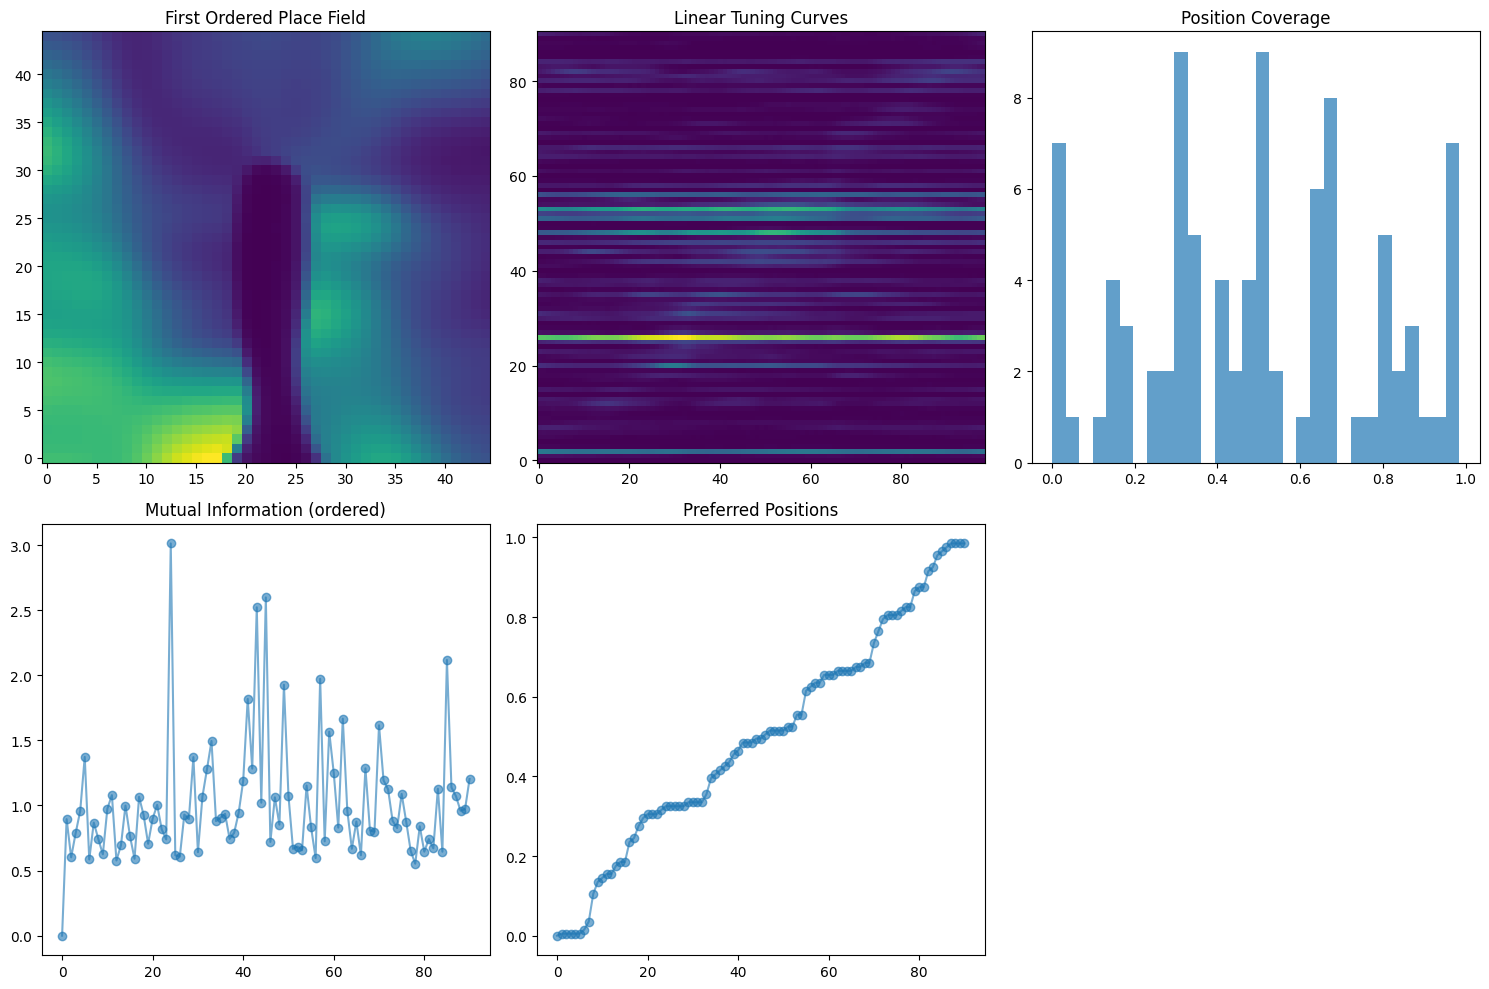

2025-08-18 17:29:42,975 - INFO - Starting Bayesian decoding with 252ms windows
2025-08-18 17:29:43,013 - INFO - Running parallel PyKeOps Bayesian decoding...


High-quality place cells: 18 neurons


2025-08-18 17:29:43,974 - INFO - Finished bayesien guess, will now process and clean.
2025-08-18 17:29:44,265 - INFO - === Decoding Summary ===
2025-08-18 17:29:44,266 - INFO - Window size: 252ms
2025-08-18 17:29:44,266 - INFO - Time steps: 3549
2025-08-18 17:29:44,267 - INFO - Mean error: 0.30 units
2025-08-18 17:29:44,267 - INFO - Median error: 0.19 units
2025-08-18 17:29:44,267 - INFO - RMSE: 0.40 units
2025-08-18 17:29:44,267 - INFO - Mean confidence: 0.132
2025-08-18 17:29:44,267 - INFO - ========================


Decoding error: 0.30
Found 91 neurons
Position range: 0.00 - 0.98


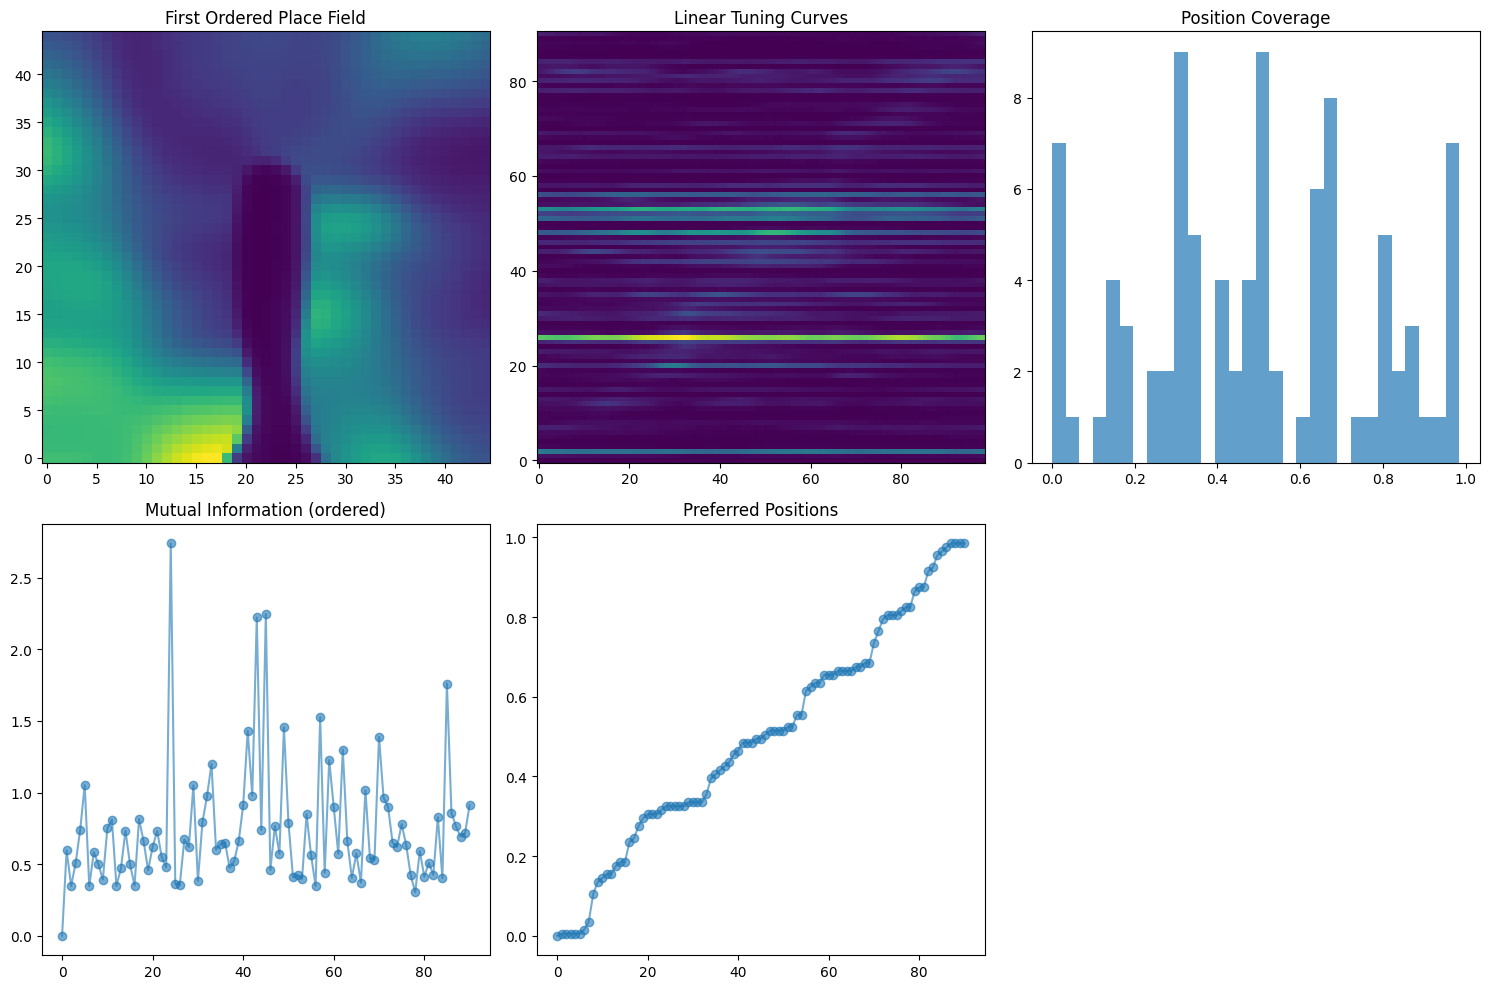

2025-08-18 17:29:44,822 - INFO - Starting Bayesian decoding with 252ms windows
2025-08-18 17:29:44,858 - INFO - Running parallel PyKeOps Bayesian decoding...


High-quality place cells: 18 neurons


2025-08-18 17:29:45,702 - INFO - Finished bayesien guess, will now process and clean.
2025-08-18 17:29:46,003 - INFO - === Decoding Summary ===
2025-08-18 17:29:46,004 - INFO - Window size: 252ms
2025-08-18 17:29:46,005 - INFO - Time steps: 3549
2025-08-18 17:29:46,005 - INFO - Mean error: 0.31 units
2025-08-18 17:29:46,005 - INFO - Median error: 0.21 units
2025-08-18 17:29:46,005 - INFO - RMSE: 0.41 units
2025-08-18 17:29:46,006 - INFO - Mean confidence: 0.154
2025-08-18 17:29:46,006 - INFO - ========================


Decoding error: 0.31
Found 91 neurons
Position range: 0.00 - 0.98


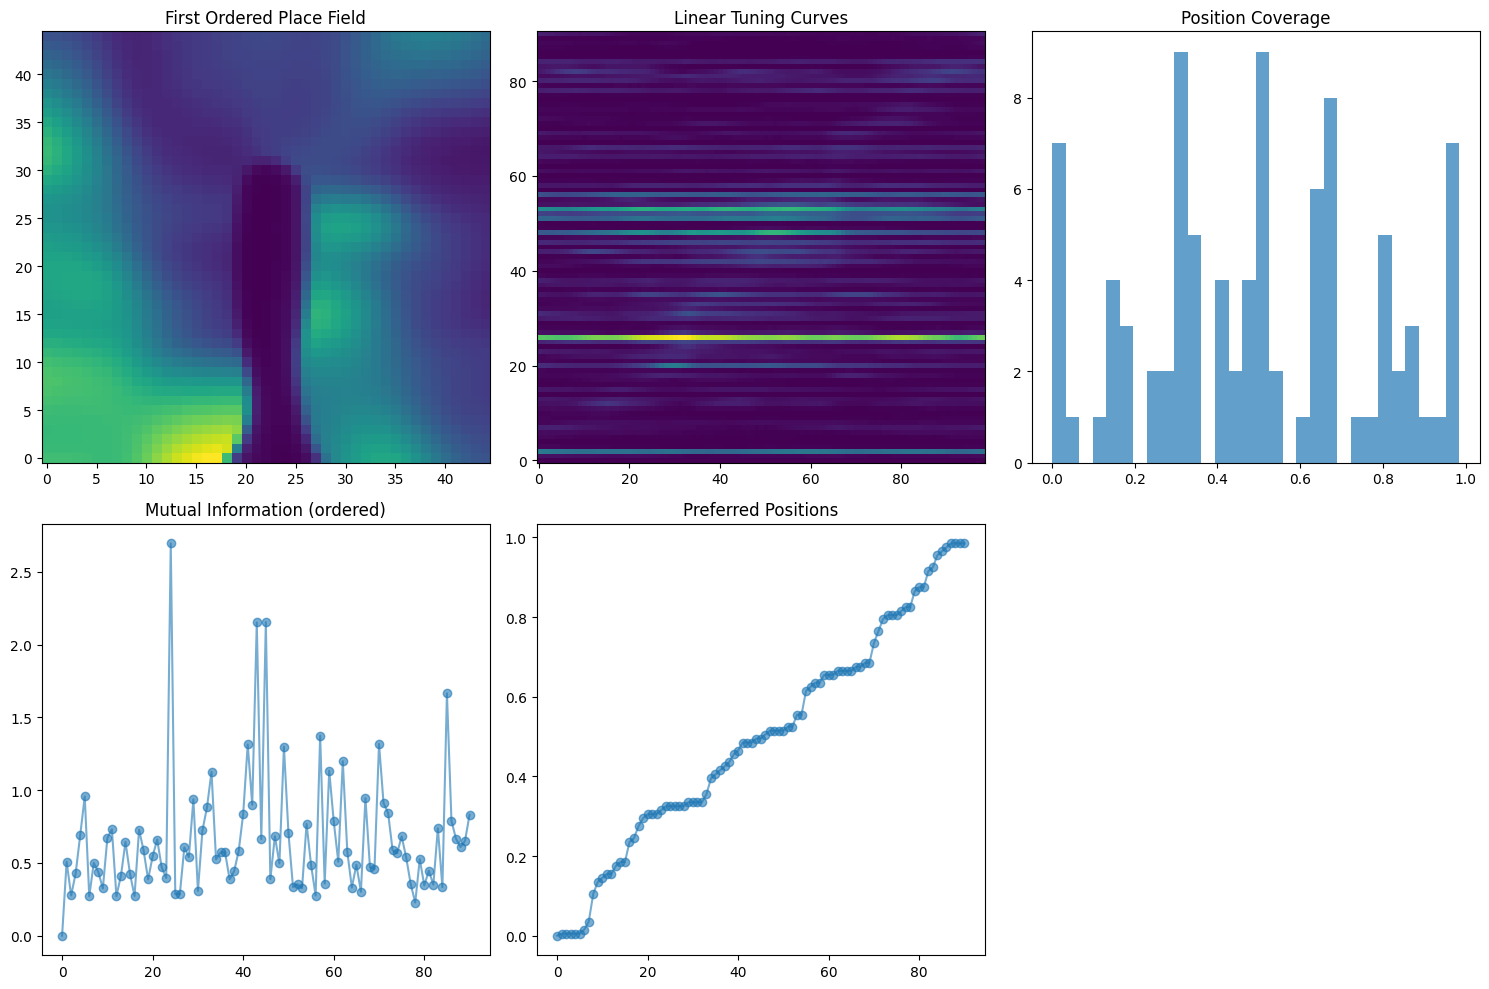

2025-08-18 17:29:46,579 - INFO - Starting Bayesian decoding with 252ms windows
2025-08-18 17:29:46,618 - INFO - Running parallel PyKeOps Bayesian decoding...


High-quality place cells: 18 neurons


2025-08-18 17:29:47,345 - INFO - Finished bayesien guess, will now process and clean.
2025-08-18 17:29:47,612 - INFO - === Decoding Summary ===
2025-08-18 17:29:47,613 - INFO - Window size: 252ms
2025-08-18 17:29:47,614 - INFO - Time steps: 3549
2025-08-18 17:29:47,614 - INFO - Mean error: 0.31 units
2025-08-18 17:29:47,614 - INFO - Median error: 0.21 units
2025-08-18 17:29:47,615 - INFO - RMSE: 0.40 units
2025-08-18 17:29:47,615 - INFO - Mean confidence: 0.143
2025-08-18 17:29:47,616 - INFO - ========================


Decoding error: 0.31
Found 91 neurons
Position range: 0.00 - 0.98


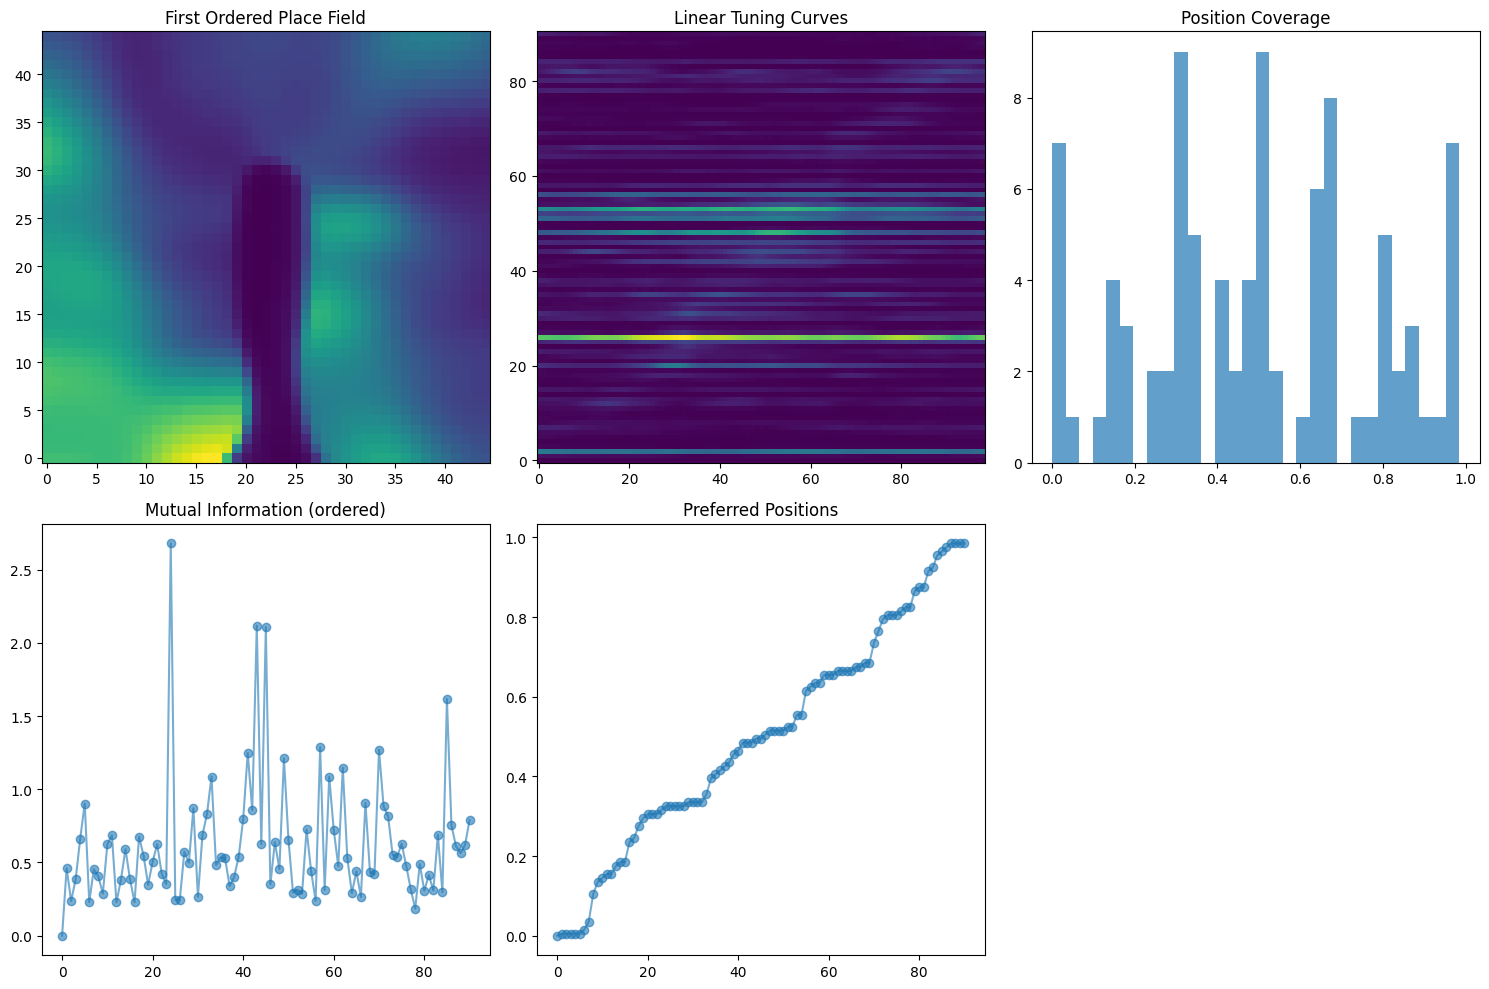

2025-08-18 17:29:48,166 - INFO - Starting Bayesian decoding with 252ms windows
2025-08-18 17:29:48,202 - INFO - Running parallel PyKeOps Bayesian decoding...


High-quality place cells: 18 neurons


2025-08-18 17:29:49,086 - INFO - Finished bayesien guess, will now process and clean.
2025-08-18 17:29:49,391 - INFO - === Decoding Summary ===
2025-08-18 17:29:49,391 - INFO - Window size: 252ms
2025-08-18 17:29:49,392 - INFO - Time steps: 3549
2025-08-18 17:29:49,392 - INFO - Mean error: 0.31 units
2025-08-18 17:29:49,392 - INFO - Median error: 0.21 units
2025-08-18 17:29:49,393 - INFO - RMSE: 0.39 units
2025-08-18 17:29:49,393 - INFO - Mean confidence: 0.125
2025-08-18 17:29:49,394 - INFO - ========================


Decoding error: 0.31
Found 91 neurons
Position range: 0.00 - 0.98


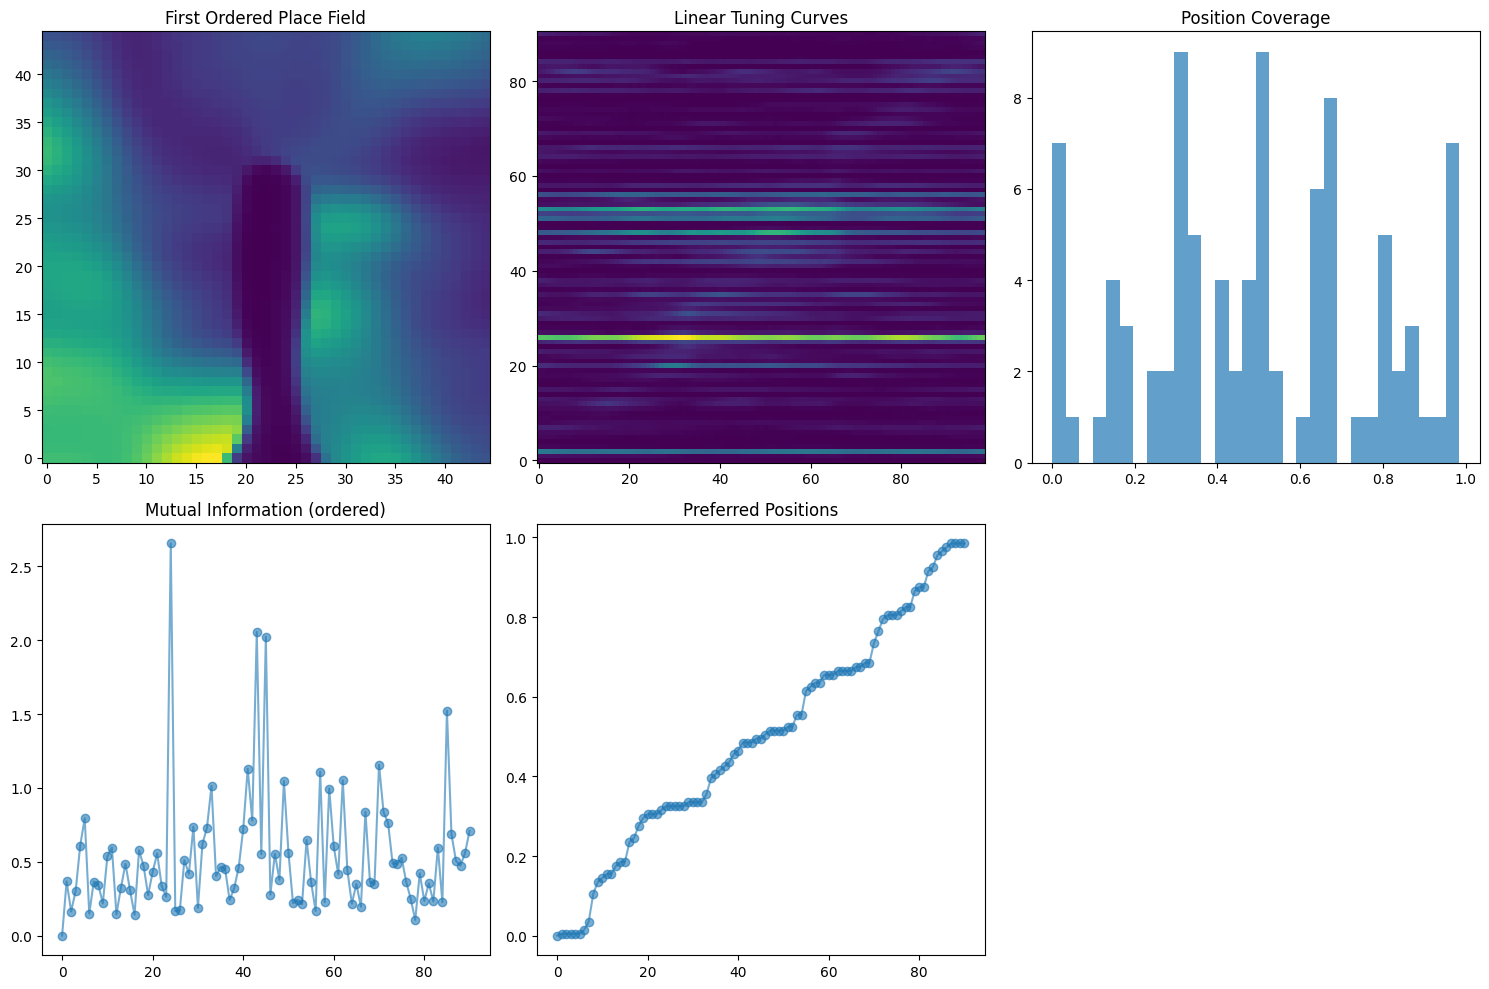

2025-08-18 17:29:50,730 - INFO - Starting Bayesian decoding with 252ms windows
2025-08-18 17:29:50,769 - INFO - Running parallel PyKeOps Bayesian decoding...


High-quality place cells: 18 neurons


2025-08-18 17:29:51,589 - INFO - Finished bayesien guess, will now process and clean.
2025-08-18 17:29:51,882 - INFO - === Decoding Summary ===
2025-08-18 17:29:51,883 - INFO - Window size: 252ms
2025-08-18 17:29:51,883 - INFO - Time steps: 3549
2025-08-18 17:29:51,884 - INFO - Mean error: 0.30 units
2025-08-18 17:29:51,884 - INFO - Median error: 0.21 units
2025-08-18 17:29:51,884 - INFO - RMSE: 0.39 units
2025-08-18 17:29:51,884 - INFO - Mean confidence: 0.112
2025-08-18 17:29:51,885 - INFO - ========================


Decoding error: 0.30


In [113]:
outputs = dict()
for decoder, matrix in zip(decoders.values(), bayesmatrices.values()):

    # 2. Explore the ordered data
    print(f"Found {len(decoder.linearPosArgSort)} neurons")
    print(f"Position range: {decoder.linearPreferredPos.min():.2f} - {decoder.linearPreferredPos.max():.2f}")

    # 3. Visualize population
    plt.figure(figsize=(15, 10))

    # Population place fields
    plt.subplot(2, 3, 1)
    plt.imshow(decoder.orderedPlaceFields[1].T, aspect='auto', origin='lower')
    plt.title('First Ordered Place Field')

    # Linear tuning curves (if computed)
    if hasattr(decoder, 'orderedLinearPlaceFields'):
        plt.subplot(2, 3, 2)
        plt.imshow(decoder.orderedLinearPlaceFields, aspect='auto', origin='lower')
        plt.title('Linear Tuning Curves')

    # Position coverage
    plt.subplot(2, 3, 3)
    plt.hist(decoder.linearPreferredPos, bins=30, alpha=0.7)
    plt.title('Position Coverage')

    # Quality metrics
    plt.subplot(2, 3, 4)
    ordered_mi = np.array([mi for tetrode_mi in matrix["mutualInfo"] 
                        for mi in tetrode_mi])[decoder.linearPosArgSort]
    plt.plot(ordered_mi, 'o-', alpha=0.6)
    plt.title('Mutual Information (ordered)')

    # Spatial ordering quality
    plt.subplot(2, 3, 5)
    plt.plot(decoder.linearPreferredPos, 'o-', alpha=0.6)
    plt.title('Preferred Positions')

    plt.tight_layout()
    plt.show()

    # 4. Identify interesting neurons
    high_quality = decoder.linearPosArgSort[ordered_mi > np.percentile(ordered_mi, 80)]
    print(f"High-quality place cells: {len(high_quality)} neurons")

    # # 5. Test decoding performance
    test_results = decoder.test_as_NN(Mouse_Results.data_helper["252"].fullBehavior, matrix, time_steps, windowSizeMS = 252, save_as_pickle = False)
    print(f"Decoding error: {test_results['performance']['mean_error']:.2f}")
    outputs[decoder.config.masking_factor] = test_results

In [116]:
with open(os.path.join(os.getcwd(), "outputs.pickle"), "wb") as f:
    pickle.dump(outputs, f)

In [120]:
outputs[20]["featurePred"]

array([[ 0.42937466,  0.22544244],
       [ 0.65345683, -0.00514806],
       [ 0.87753899,  0.13320624],
       ...,
       [ 0.60864039,  0.08708814],
       [ 0.58623218,  0.15626529],
       [ 0.51900753, -0.00514806]])

In [122]:
%matplotlib qt

In [123]:
Mouse_Results.load_results(winMS = 252, which = "both")

total windows: 960 | selected windows: 289 (thresh -4.2158933  ( 30.0 %) )
mean eucl. error: 0.28761060862817467 | selected error: 0.2590325571647716
mean linear error: 0.16415624999999998 | selected error: 0.11934256055363325
threshold value: -4.2158933






2025-08-18 18:37:19,709 - INFO - Starting Bayesian decoding with 252ms windows
2025-08-18 18:37:19,746 - INFO - Running parallel PyKeOps Bayesian decoding...


2025-08-18 18:37:20,541 - INFO - Finished bayesien guess, will now process and clean.
2025-08-18 18:37:20,995 - INFO - === Decoding Summary ===
2025-08-18 18:37:20,995 - INFO - Window size: 252ms
2025-08-18 18:37:20,996 - INFO - Time steps: 3549
2025-08-18 18:37:20,996 - INFO - Mean error: 0.31 units
2025-08-18 18:37:20,997 - INFO - Median error: 0.21 units
2025-08-18 18:37:20,997 - INFO - RMSE: 0.39 units
2025-08-18 18:37:20,997 - INFO - Mean confidence: 0.116
2025-08-18 18:37:20,997 - INFO - ========================


total windows: 3549 | selected windows: 1065 (thresh 0.1043671684285104  ( 30.0 %) )
mean eucl. error: 0.30575690732157107 | selected error: 0.3222032508455769
mean linear error: 0.2317462095728742 | selected error: 0.2858524368884427
threshold value: 0.121600586843724424
threshold value: 0.041004386093629074






phase  windowSizeMS  mean_ann  select_ann  mean_lin_ann  select_lin_ann  \
0   pre           108  0.282529    0.267379      0.158691        0.152959   
1   pre           252  0.287611    0.259033      0.164156        0.119343   

   mean_eucl_bayes  select_lin_bayes  mean_lin_bayes  
0         0.341317          0.273002        0.251976  
1         0.305757          0.285852        0.231746

### looking at bayes prob vs certitude

In [145]:
Mouse_Results.test_bayes()

2025-08-18 18:42:27,018 - INFO - Training and ordering neurons by position preference...
2025-08-18 18:42:27,019 - INFO - Starting Bayesian training process...
2025-08-18 18:42:27,028 - INFO - Using adaptive bandwidth: 0.0661 (based on 13743 samples). To be compared with fullBehaviorData['Bandwidth']: 0.0688
2025-08-18 18:42:27,662 - INFO - Occupation map regularization factor: 4.9383e-12. before would have been changed by 2.1108954009781115e-06
2025-08-18 18:42:27,662 - INFO - Occupation map: max=0.0014, threshold=0.0001, effective masking of 13.32%
2025-08-18 18:42:27,663 - INFO - Aligning speed-filter with spike times using PyKeops
100%|██████████| 4/4 [05:20<00:00, 80.15s/it]
2025-08-18 18:47:48,261 - INFO - Speed filters aligned successfully
2025-08-18 18:47:48,261 - INFO - Building marginal and local rate functions for 4 tetrodes...
100%|██████████| 4/4 [00:32<00:00,  8.00s/it]
2025-08-18 18:48:20,321 - INFO - Bayesian matrices saved successfully.
2025-08-18 18:48:20,322 - INFO -

{'linPred': [array([0.08636364, 0.14393939, 0.19191916, ..., 0.93282896, 0.9232335 ,
         1.        ], dtype=float32),
  array([0.19191916, 0.10555556, 0.95202017, ..., 0.93282896, 0.95202017,
         1.        ], dtype=float32)],
 'fullPred': [array([[ 0.45178288,  0.2485015 ],
         [ 0.42937467,  0.40991485],
         [ 0.42937467,  0.54826915],
         ...,
         [ 0.7430897 ,  0.2023834 ],
         [ 0.7654979 ,  0.22544244],
         [ 0.5190075 , -0.00514806]], dtype=float32),
  array([[ 0.42937467,  0.54826915],
         [ 0.42937467,  0.31767863],
         [ 0.877539  ,  0.13320625],
         ...,
         [ 0.56382394,  0.2023834 ],
         [ 0.56382394,  0.13320625],
         [ 0.5190075 , -0.00514806]], dtype=float32)],
 'probaBayes': [array([[0.08594549],
         [0.01362978],
         [0.02146098],
         ...,
         [0.03016972],
         [0.02074699],
         [0.0154318 ]], dtype=float32),
  array([[0.12575233],
         [0.01907091],
         [0.0201

In [140]:
Mouse_Results.resultsNN["fullPred"][1].shape

(960, 2)

### back to all

In [124]:
Mouse_Results.load_data(suffixes = ["_training", "_cond", "_pre"])

In [125]:
Mouse_Results.resultsNN_phase["_pre"]["posIndex"][0]

array([167262, 167264, 167266, ..., 170516, 170518, 170520], dtype=int32)

In [126]:
Mouse_Results.resultsNN_phase["_pre"]["truePos"][0][:,0]

array([0.9088564 , 0.90216225, 0.9076404 , ..., 0.6447253 , 0.64590067,
       0.6444857 ], dtype=float32)

In [127]:
Mouse_Results.data_helper['108'].fullBehavior["Positions"][Mouse_Results.resultsNN_phase["_pre"]["posIndex"][0]][:,0]

array([0.90885637, 0.90216224, 0.90764038, ..., 0.64472532, 0.64590064,
       0.64448569])

In [129]:
Mouse_Results.data_helper['108'].fullBehavior["Speed"][Mouse_Results.resultsNN_phase["_pre"]["posIndex"][0]]

array([[3.98237886],
       [3.01890491],
       [0.11124305],
       ...,
       [0.80664187],
       [0.09759047],
       [0.11077454]])

In [130]:
%matplotlib qt

In [131]:
Mouse_Results

Mouse_Results(mouse_name=1199, manipe=PAG, name_exp=current_LogLoss_Transformer_Dense_Transformer, target=pos, phase=pre, path=/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG, windows=['108', '252'])

In [132]:
Mouse_Results.data_helper['108'].fullBehavior['Times']['start_freeze'][455]

array([11560.37183522])

In [133]:
Mouse_Results_Cond = MOBS_Functions.Mouse_Results(Dir, mouse_name=mouse, manipe=manipe, target=target, 
                                                        nameExp=nameExp, nEpochs=nEpochs, phase="cond", 
                                                        deviceName="gpu", windows=windowSizeMS,
                                                        isTransformer = "LSTM" not in nameExp, denseweight= True, 
                                                        transform_w_log = True,
                                                        which = "ann",
                                                        isPredLoss = False,
                                                        )

Path for 1199 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows found for 1199: ['108', '252']
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before


/home/theodechrn/Documents/Cours/phd/neuroEncoders/notebooks/../neuroencoders/utils/MOBS_Functions.py:805: UserWarning: Failed to load project for window 108 with error: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/current_LogLoss_Transformer_Dense_Transformer/Project_108.pkl/Project_108.pkl'. Creating new Project and DataHelper.
  warn(
/home/theodechrn/Documents/Cours/phd/neuroEncoders/.venv/lib/python3.11/site-packages/tables/attributeset.py:322: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/theodechrn/Documents/Cours/phd/neuroEncoders/.venv/lib/python3.11/site-packages/tables/attributeset.py:322: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/theodechrn/Documents/Cours/phd/neuroEncoders/notebo

ValueError: No GPU devices found.

In [20]:
Mouse_Results_Cond.load_data(suffixes = ["_training", "_cond", "_pre"])

In [21]:
Mouse_Results.windows_values

[108, 252]

In [22]:
positionTime_NN = Mouse_Results.resultsNN_phase["_cond"]["time"][1]
position_NN = Mouse_Results.resultsNN_phase["_cond"]["truePos"][1]
posIndex_NN = Mouse_Results.resultsNN_phase["_cond"]["posIndex"][1]

In [23]:
position_NN

array([[0.6614693 , 0.93024445],
       [0.7356999 , 0.9342132 ],
       [0.82041854, 0.932617  ],
       ...,
       [0.40242782, 0.9263684 ],
       [0.4023014 , 0.9266644 ],
       [0.4015681 , 0.92743826]], dtype=float32)

In [24]:
positionTime = Mouse_Results.data_helper['252'].fullBehavior['positionTime']
position = Mouse_Results.data_helper['252'].fullBehavior['Positions'][posIndex_NN][:,0]

In [25]:
PosMat = Mouse_Results.data_helper['252'].fullBehavior['Times']['PosMat']
PosMatStimMask = PosMat[:,3] ==1
PosMatStimMask.sum()

11

In [26]:
stim_indices = np.where(PosMatStimMask)[0]

In [27]:
stim_indices

array([192291, 192390, 196260, 199083, 199172, 204185, 204277, 204368,
       209787, 211597, 218441])

In [28]:
tRipples = Mouse_Results.data_helper['252'].fullBehavior['Times']['tRipples']

In [29]:
# we have a high prob of having ripples during sleep, so let's crop tRipples to wake epochs by selecting values in train/test epochs (ie wake most of the time, or subsets of wake that we will plot)
ripples_indices = np.array(
                    sorted(
                            [
                                ep.find_closest_index(
                                    positionTime, t, tolerance=True
                                )
                                for t in tRipples
                            ]
                    )
                )
ripples_indices = ripples_indices[ripples_indices != -1]

/home/mickey/Documents/Theotime/neuroEncoders/importData/epochs_management.py:283: UserWarning: Tolerance is set to True, will compare against apparent sampling rate.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/importData/epochs_management.py:286: RuntimeWarning: Mean of empty slice
  tolerance = np.nanmean(


In [30]:

start_freeze = Mouse_Results.data_helper['108'].fullBehavior['Times']['start_freeze']
stop_freeze = Mouse_Results.data_helper['108'].fullBehavior['Times']['stop_freeze']

### looking at pre

In [78]:
prediction_time = Mouse_Results.resultsNN_phase["_pre"]["time"][1]
predicted = Mouse_Results.resultsNN_phase["_pre"]["fullPred"][1]
positions_from_NN = Mouse_Results.resultsNN_phase["_pre"]["truePos"][1]
posIndex = Mouse_Results.resultsNN_phase["_pre"]["posIndex"][1]
linearized_pred = Mouse_Results.resultsNN_phase["_pre"]["linPred"][1]
linearized_true = Mouse_Results.l_function(Mouse_Results.data_helper['252'].fullBehavior["Positions"])[1]

In [85]:
positions = Mouse_Results.data_helper['252'].fullBehavior["Positions"]

In [79]:
speed_mask = Mouse_Results.resultsNN_phase["_pre"]["speedMask"][1]

In [80]:
time = Mouse_Results.data_helper['252'].fullBehavior["positionTime"]

In [81]:
direction = Mouse_Results.data_helper['252']._get_traveling_direction(linearized_true)

In [82]:
direction = Mouse_Results.data_helper['252']._get_traveling_direction(linearized_true)

In [83]:
epochMask = ep.inEpochsMask(
    time,
    Mouse_Results.data_helper['252'].fullBehavior["Times"]["testEpochs"],
).flatten()

In [84]:
otherMask = (time >= prediction_time[0]) & (time <= prediction_time[-1])
otherMask = otherMask.flatten()

In [182]:
winms = "252"
suffix = "_pre"
idx = 1
phase = "pre"

In [191]:
Mouse_Results.save_video_frame_linearly(
    data_helper=Mouse_Results.data_helper[winms],
    positions=Mouse_Results.resultsNN_phase[suffix]["truePos"][
        idx
    ],
    predicted=Mouse_Results.resultsNN_phase[suffix]["fullPred"][
        idx
    ],
    prediction_time=Mouse_Results.resultsNN_phase[suffix][
        "time"
    ][idx],
    posIndex=Mouse_Results.resultsNN_phase[suffix]["posIndex"][
        idx
    ],
    linearized_true=linearized_true,
    linearized_pred=Mouse_Results.resultsNN_phase[suffix][
        "linPred"
    ][idx],
    windowSizeMS=252,
    pair_points=True,
    l_function=Mouse_Results.l_function,
    linear_position_mode=True,
    alpha_delta_line=0.75,
    blit=False,
    plot_all_stims=(phase == "cond"),
    auto_encode=True,
    dpi=300,
    output_dir=os.path.join(
        "/home/mickey/download",
        "tmp_figures",
        "filtered",
    ),
    video_path=os.path.join(
        "/home/mickey/download",
        "tmp_figures",
        "filtered_video_better.mp4",
    ))

[autoreload of importData.gui_elements failed: Traceback (most recent call last):
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 319, in update_instances
    refs = gc.get_referrers(old)
Keyboar

⏱ Starting 'save_video_frame_linearly'...
Setting up multipanel plot (trajectory, concordant/discordant, and linear position movie)...
Binary direction data detected (0s and 1s) for top left.
0 (shock zone) -> xkcd:hot pink
1 (safe zone) -> cornflowerblue


/home/mickey/Documents/Theotime/neuroEncoders/importData/epochs_management.py:283: UserWarning: Tolerance is set to True, will compare against apparent sampling rate.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:656: UserWarning: Predicted positions do not contain head direction or speed. Computing them from positions.
  gs = self.fig.add_gridspec(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:1511: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  handles_for_legend.append(predicted_handle)
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:1488: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  if self.predicted is not None:


🚀 Using linear loop for rendering


Rendering frames:   0%|          | 1/3440 [00:00<00:04, 834.02frame/s]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [198]:
Mouse_Results.show_movie(phase = "pre", linear_position_mode = True, l_function = Mouse_Results.l_function,
                         prediction_time = prediction_time, predicted = predicted,
                         positions_from_NN = positions_from_NN, posIndex = posIndex, 
                         linearized_true = linearized_true, linearized_pred = linearized_pred, 
                         very_simple_plot = False, plot_all_stims = False, fps = 256, blit = False,
                         interval = 50)

/home/mickey/Documents/Theotime/neuroEncoders/importData/epochs_management.py:283: UserWarning: Tolerance is set to True, will compare against apparent sampling rate.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:656: UserWarning: Predicted positions do not contain head direction or speed. Computing them from positions.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:1511: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  self.artists[name_axis]["current_predicted_point"] = ax.scatter(


Setting up multipanel plot (trajectory, concordant/discordant, and linear position movie)...
Binary direction data detected (0s and 1s) for top left.
0 (shock zone) -> xkcd:hot pink
1 (safe zone) -> cornflowerblue


/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:1488: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  self.artists[name_axis]["predicted_points"] = ax.scatter(


### Looking at cond

In [66]:
Mouse_Results.resultsNN_phase["_cond"].keys()

dict_keys(['time', 'speedMask', 'linPred', 'fullPred', 'truePos', 'linTruePos', 'predLoss', 'posIndex'])

In [32]:
prediction_time = Mouse_Results.resultsNN_phase["_cond"]["time"][1][:500]
predicted = Mouse_Results.resultsNN_phase["_cond"]["fullPred"][1][:500]
positions_from_NN = Mouse_Results.resultsNN_phase["_cond"]["truePos"][1][:500]
posIndex = Mouse_Results.resultsNN_phase["_cond"]["posIndex"][1][:500]
linearized_pred = Mouse_Results.resultsNN_phase["_cond"]["linPred"][1][:500]
linearized_true = Mouse_Results.l_function(Mouse_Results.data_helper['252'].fullBehavior["Positions"])[1]

In [33]:
speed_mask = Mouse_Results.resultsNN_phase["_cond"]["speedMask"][1][:500]

In [34]:
# create a random boolean mask for predLoss, size 200
predLoss_mask = np.random.choice([True, False], size=200, p=[0.7, 0.3])

In [35]:
time = Mouse_Results.data_helper['252'].fullBehavior["positionTime"]

In [61]:
direction = Mouse_Results.data_helper['252']._get_traveling_direction(linearized_true)

In [36]:
epochMask = ep.inEpochsMask(
    time,
    Mouse_Results.data_helper['252'].fullBehavior["Times"]["testEpochs"],
)

In [37]:
direction = Mouse_Results.data_helper['252']._get_traveling_direction(linearized_true)

In [38]:
epochMask = epochMask.flatten()

In [63]:
otherMask = (time >= prediction_time[0]) & (time <= prediction_time[-1])
otherMask = otherMask.flatten()

In [39]:
plt.scatter(time[epochMask], linearized_true[epochMask], c = direction[epochMask])
plt.colorbar()

In [40]:
otherMask = (time >= prediction_time[0]) & (time <= prediction_time[-1])
otherMask = otherMask.flatten()

In [50]:
direction_pred = Mouse_Results.data_helper['252']._get_traveling_direction(Mouse_Results.resultsNN_phase["_cond"]["linTruePos"][1][:500])

In [49]:
plt.scatter(positions_from_NN[:,0], positions_from_NN[:,1], c = direction_pred)
plt.colorbar()

In [44]:
plt.scatter(time[otherMask], linearized_true[otherMask], c = direction[otherMask])
plt.colorbar()

In [45]:
direction_pred = Mouse_Results.data_helper['252']._get_traveling_direction(linearized_pred)

In [46]:
plt.scatter(prediction_time, linearized_pred, c = direction_pred)

In [54]:
Mouse_Results.show_movie(phase = "cond", linear_position_mode = True, l_function = Mouse_Results.l_function,
                         prediction_time = prediction_time, predicted = predicted,
                         positions_from_NN = positions_from_NN, posIndex = posIndex, 
                         linearized_true = linearized_true, linearized_pred = linearized_pred, very_simple_plot = False, plot_all_stims = True)

/home/mickey/Documents/Theotime/neuroEncoders/importData/epochs_management.py:283: UserWarning: Tolerance is set to True, will compare against apparent sampling rate.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:560: UserWarning: Predicted positions do not contain head direction or speed. Computing them from positions.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:1393: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  self.artists[name_axis]["current_predicted_point"] = ax.scatter(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:1370: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  self.artists[name_axis]["predicted_points"] = ax.scatter(


Setting up multipanel plot (trajectory, concordant/discordant, and linear position movie)...
Binary direction data detected (0s and 1s) for top left.
0 (shock zone) -> xkcd:hot pink
1 (safe zone) -> cornflowerblue


### just looking

In [14]:
%matplotlib qt

In [22]:
quantile_predLoss = np.quantile(
    Mouse_Results.resultsNN_phase["_pre"]["predLoss"][-1], 0.3
)
selection = (
    Mouse_Results.resultsNN_phase["_pre"]["predLoss"][-1]
    < quantile_predLoss
)

In [74]:
Mouse_Results.DataHelper.fullBehavior

{'Positions': array([[       nan,        nan],
        [       nan,        nan],
        [       nan,        nan],
        ...,
        [0.0659093 , 0.03376651],
        [0.0664273 , 0.03169172],
        [0.06422408, 0.0342733 ]]),
 'positionTime': array([[6.89580314e-02],
        [1.37916063e-01],
        [2.06874094e-01],
        ...,
        [2.78811755e+04],
        [2.78812458e+04],
        [2.78813160e+04]]),
 'Speed': array([[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [2.4714859 ],
        [1.02786186],
        [1.77045271]]),
 'Bandwidth': 0.06875096783148096,
 'Times': {'learning': 952.672200809011,
  'trainEpochs': array([10802.76942837, 11541.76503124, 11790.44588803, 12305.256     ,
         12307.85724409, 12530.13075822, 12547.788     , 12547.788     ,
         12550.4251842 , 12550.4251842 , 12778.17958028, 12790.356     ,
         12792.99324409, 13032.924     , 13035.56144444, 13275.492     ]),
  'testEpochs': array([11541.76503124, 1

In [102]:
Mouse_Results.DataHelper.get_training_imbalance()

0.9748519510018658

In [96]:
Mouse_Results.shock_zone
x_min, x_max = Mouse_Results.shock_zone[:, 0].min(), Mouse_Results.shock_zone[:, 0].max()
y_min, y_max = Mouse_Results.shock_zone[:, 1].min(), Mouse_Results.shock_zone[:, 1].max()

training_mask = ep.inEpochsMask(
    Mouse_Results.DataHelper.fullBehavior['positionTime'],
    Mouse_Results.DataHelper.fullBehavior['Times']['trainEpochs'],
).flatten() & np.logical_not(np.isnan(Mouse_Results.DataHelper.fullBehavior['Positions']).any(axis=1))

in_shock_zone_mask = (
    (Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 0] >= x_min) &
    (Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 0] <= x_max) &
    (Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 1] >= y_min) &
    (Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 1] <= y_max)
)

In [99]:
plt.hist2d(Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 0], Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 1], bins=100)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., 11., ...,  1.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  5.,  5.,  0.]]),
 array([0.00361855, 0.01347816, 0.02333778, 0.03319739, 0.04305701,
        0.05291662, 0.06277624, 0.07263585, 0.08249547, 0.09235509,
        0.1022147 , 0.11207432, 0.12193393, 0.13179355, 0.14165316,
        0.15151278, 0.16137239, 0.17123201, 0.18109162, 0.19095124,
        0.20081085, 0.21067047, 0.22053008, 0.2303897 , 0.24024931,
        0.25010893, 0.25996854, 0.26982816, 0.27968778, 0.28954739,
        0.29940701, 0.30926662, 0.31912624, 0.32898585, 0.33884547,
        0.34870508, 0.3585647 , 0.36842431, 0.37828393, 0.38814354,
        0.39800316, 0.40786277, 0.41772239, 0.427582  , 0.43744162,
        0.44730124, 0.45716085, 0.46702047, 0.47688008, 0.4867397 ,
        0.49659931, 0.50645893, 0.5

In [101]:
(Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 0] <= x_max).sum() / (Mouse_Results.DataHelper.fullBehavior['Positions'][training_mask, 0] >= 0.655555).sum()

0.9748519510018658

In [71]:
plt.scatter(Mouse_Results.resultsNN_phase["_pre"]["truePos"][-1][:, 0], Mouse_Results.resultsNN_phase["_pre"]["truePos"][-1][:, 1], c = in_shock_zone_mask, s=10)

In [ ]:
np.where(Mouse_Results.DataHelper.fullBehavior['Positions'])

In [48]:
Mouse_Results.DataHelper.fullBehavior['Positions']

array([[       nan,        nan],
       [       nan,        nan],
       [       nan,        nan],
       ...,
       [0.0659093 , 0.03376651],
       [0.0664273 , 0.03169172],
       [0.06422408, 0.0342733 ]])

In [115]:
Mouse_Results.Params.isTransformer

False

In [112]:
Mouse_Results.show_movie(
    positions = Mouse_Results.resultsNN['truePos'][-1],
    predicted= Mouse_Results.resultsNN['fullPred'][-1],
    speedMaskArray = Mouse_Results.resultsNN['speedMask'][-1],
    #predLossMask = selection,
    pair_points = True, interval = 70, l_function = Mouse_Results.l_function, linear_position_mode = True,
    alpha_delta_line= 0.75, blit = True, window_size=2
)

/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:245: UserWarning: Warning: Epoch mask and positions have different lengths. Using all positions. This error is normal if you gave custom positions and are not using DataHelper.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:371: UserWarning: Predicted positions do not contain head direction or speed. Computing them from positions.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:838: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  self.artists["predicted_points"] = self.ax.scatter(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:861: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  self.artists["current_predicted_point"] = self.ax

In [34]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Mouse_Results.save_video_frame_with_pool(
        output_dir = "/home/mickey/download/bonjourkaotismus",
        video_path = "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/Mouse_Results_1199_PAG_position_WeirdLoss_RMS_newUncertainty_DENSE_LSTM_pre.mp4",
        positions = Mouse_Results.resultsNN['truePos'][-1],
        predicted= Mouse_Results.resultsNN['fullPred'][-1],
        speedMaskArray = Mouse_Results.resultsNN['speedMask'][-1],
        predLossMask = selection,
        pair_points = True, interval = 70, l_function = Mouse_Results.l_function, linear_position_mode = True,
        alpha_delta_line= 0.75, blit = True,
        auto_encode=True
    )

⏱ Starting 'save_video_frame_with_pool'...
🚀 Using multiprocessing.Pool for rendering


Rendering frames: 100%|██████████| 283/283 [00:13<00:00, 21.18it/s]
ffmpeg version 4.4.2-0ubuntu0.22.04.1+esm7 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.4.0-1ubuntu1~22.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1+esm7 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheor

🎬 Encoding video with ffmpeg...


[libx264 @ 0x5e7ccff0dc80] using SAR=1/1
[libx264 @ 0x5e7ccff0dc80] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2 AVX512
[libx264 @ 0x5e7ccff0dc80] profile High, level 5.2, 4:2:0, 8-bit
[libx264 @ 0x5e7ccff0dc80] 264 - core 163 r3060 5db6aa6 - H.264/MPEG-4 AVC codec - Copyleft 2003-2021 - http://www.videolan.org/x264.html - options: cabac=1 ref=5 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=8 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=2 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=48 lookahead_threads=8 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=3 b_pyramid=2 b_adapt=1 b_bias=0 direct=3 weightb=1 open_gop=0 weightp=2 keyint=250 keyint_min=25 scenecut=40 intra_refresh=0 rc_lookahead=50 rc=crf mbtree=1 crf=16.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00
Output #0, mp4, to '/home/mickey/Documents/Theotime/neuroEncoders/notebooks/Mouse_Results_1199_PAG_

✅ Video saved to /home/mickey/Documents/Theotime/neuroEncoders/notebooks/Mouse_Results_1199_PAG_position_WeirdLoss_RMS_newUncertainty_DENSE_LSTM_pre.mp4
✅ Finished 'save_video_frame_with_pool' in 32.48 seconds


frame=  959 fps= 53 q=-1.0 Lsize=    5244kB time=00:00:15.93 bitrate=2696.1kbits/s speed=0.886x    
video:5232kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.224986%
[libx264 @ 0x5e7ccff0dc80] frame I:4     Avg QP: 8.49  size:149876
[libx264 @ 0x5e7ccff0dc80] frame P:310   Avg QP:18.93  size: 10859
[libx264 @ 0x5e7ccff0dc80] frame B:645   Avg QP:24.74  size:  2157
[libx264 @ 0x5e7ccff0dc80] consecutive B-frames:  5.7%  9.8% 11.9% 72.6%
[libx264 @ 0x5e7ccff0dc80] mb I  I16..4: 46.4% 12.4% 41.2%
[libx264 @ 0x5e7ccff0dc80] mb P  I16..4:  0.2%  0.2%  0.7%  P16..4:  1.1%  0.3%  0.2%  0.0%  0.0%    skip:97.3%
[libx264 @ 0x5e7ccff0dc80] mb B  I16..4:  0.0%  0.0%  0.1%  B16..8:  1.7%  0.1%  0.1%  direct: 0.1%  skip:97.9%  L0:52.4% L1:46.4% BI: 1.2%
[libx264 @ 0x5e7ccff0dc80] 8x8 transform intra:17.3% inter:40.3%
[libx264 @ 0x5e7ccff0dc80] direct mvs  spatial:96.9% temporal:3.1%
[libx264 @ 0x5e7ccff0dc80] coded y,uvDC,uvAC intra: 28.2% 31.3% 29.7% inter: 0.3% 0

In [16]:
Mouse_Results.show_movie(interval = 60, pair_points = True, fourD_analysis_mode = False, l_function = Mouse_Results.l_function, linear_position_mode = False, be_fast = False, block = True, with_ref_bg = True)

/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:367: UserWarning: Predicted positions do not contain head direction or speed. Computing them from positions.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:834: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  self.artists["predicted_points"] = self.ax.scatter(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:857: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  self.artists["current_predicted_point"] = self.ax.scatter(


In [126]:
Mouse_Results.show_movie(interval = 60, pair_points = True, fourD_analysis_mode = False, l_function = Mouse_Results.l_function, linear_position_mode = True, save_path = "/home/mickey/Dropbox/karim_laderniere.mp4")

Saving animation to /home/mickey/Dropbox/karim_laderniere.mp4...


/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:358: UserWarning: Predicted positions do not contain head direction or speed. Computing them from positions.
  warn(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:821: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  self.artists["predicted_points"] = self.ax.scatter(
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:844: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  self.artists["current_predicted_point"] = self.ax.scatter(


Animation saved!


In [11]:
Mouse_Results.load_results(which = "ann", winMS = 108, phase = 'training', useTrain = True, template = 'pre', useSpeedMask = True)

total windows: 56064 | selected windows: 6801 (thresh -5.209544  ( 30.0 %) )
mean eucl. error: 0.4790490901077013 | selected error: 0.3786526004253052
mean linear error: 0.36382705479452054 | selected error: 0.3236068225260992


/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:230: UserWarning: Warning: useSpeedMask is True, and training_data is provided, so will be using speedMask on data.
  warnings.warn(
/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:869: UserWarning: useSpeedMask is True, so will be using speedMask to select the windows in fig_interror.
  warnings.warn(
/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:1195: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


threshold value: -5.870103156


/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:869: UserWarning: useSpeedMask is True, so will be using speedMask to select the windows in fig_interror.
  warnings.warn(
/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:1195: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:869: UserWarning: useSpeedMask is True, so will be using speedMask to select the windows in fig_interror.
  warnings.warn(
/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:1195: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:869: UserWarning: useSpeedMask is True, so will be using speedMask to select the windows in fig_interror.
  warnings.warn(
/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:1195: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


phase  windowSizeMS  mean_ann  select_ann  mean_lin_ann  select_lin_ann
0       pre           108  0.484736    0.435572      0.319679        0.330542
1  training           108  0.479049    0.378653      0.363827        0.323607

In [12]:
rawdata_parser.speed_filter(
    Mouse_Results.Project.folder,
    overWrite=False,
    phase="cond",
    template="pre",
    window_range=2000,
    force= False,
)
rawdata_parser.select_epochs(
    Mouse_Results.Project.folder,
    overWrite=False,
    phase="cond",
    force=False,
    find_best_sets=True,
)
DataHelper_cond = DataHelperClass(
    Mouse_Results.Project.xml,
    mode="ann",
    target="pos",
    phase="cond",
    nameExp=Mouse_Results.nameExp,
    windowSizeMS=108,
    force_ref=False,
    isPredLoss=False,
)


speedMask already created
with value: 1.505792377078085
epochs already created
extending trainEpochs with lossPredSetEpochs as you're not using predLoss


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/utils/global_classes.py:76: UserWarning: Using windowSizeMS argument is deprecated, please use windowSize instead.
  warn(


In [13]:
helper = DataHelper_cond
from importData.epochs_management import inEpochsMask

In [14]:
Linearizer = UMazeLinearizer(
    Mouse_Results.Project.folder, phase=helper.phase, data_helper=helper
)
Linearizer.verify_linearization(
    helper.positions / helper.maxPos(),
    Mouse_Results.Project.folder,
    overwrite=False,
)

speedMask = helper.fullBehavior["Times"]["speedFilter"]
epochMask = inEpochsMask(
    helper.fullBehavior["positionTime"][:, 0],
    helper.fullBehavior["Times"]["trainEpochs"],
)
totMask = speedMask * epochMask
full_training_true_positions = helper.fullBehavior["Positions"][totMask]

Linearizer.plot_linearization_variable(
    full_training_true_positions / np.max(full_training_true_positions),
    folder=Mouse_Results.Project.folder,
    show=True,
    training=True,
)

l_function = Linearizer.pykeops_linearization

# Now that we have the linearization function, we can get the true target
helper.get_true_target(
    l_function, in_place=True, show=True, speedMask=True
)


found data_helper, using its custom lines
Linearization points have been created before
No linearization variable provided, computing it.


array([[       nan,        nan],
       [       nan,        nan],
       [       nan,        nan],
       ...,
       [0.10757046, 0.95702984],
       [0.10757046, 0.95702984],
       [0.10758598, 0.95671855]])

In [15]:
Parameters = Params(
    helper=helper,
    windowSize=0.108,
    nEpochs=200,
    phase="pre",
    batchSize=256,
    save_json=True,
    isTransformer=True,
    transform_w_log=True,
    denseweight=True,
)


In [16]:
Mouse_Results.ann['108'].test(
    helper.fullBehavior,
    l_function = Mouse_Results.l_function,
    windowSizeMS = 108,
    isPredLoss = False,
    useSpeedFilter = False,
    phase = "cond",
    useTrain = True
)

Loading the weights of the trained network
INFERRING
138/138 [==============================] - 126s 891ms/step
gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask


{'featurePred': array([[0.80938476, 0.59091955],
        [0.8376929 , 0.8101579 ],
        [0.7747123 , 0.6937017 ],
        ...,
        [0.9387168 , 0.2989712 ],
        [0.9041656 , 0.29061192],
        [0.89683795, 0.21921366]], dtype=float32),
 'featureTrue': array([[0.9439893 , 0.87263163],
        [0.9439893 , 0.87263163],
        [0.94784451, 0.87690551],
        ...,
        [0.76422911, 0.14333989],
        [0.76395154, 0.14433043],
        [0.76395154, 0.14433043]]),
 'times': array([ 8193.2705,  8193.32  ,  8193.381 , ..., 10127.669 , 10127.729 ,
        10127.785 ], dtype=float32),
 'predLoss': array([[-5.4516535],
        [-4.968664 ],
        [-4.30168  ],
        ...,
        [-4.834951 ],
        [-5.179448 ],
        [-5.070943 ]], dtype=float32),
 'posLoss': array([-1.8942693, -2.7879415, -3.249992 , -3.296082 , -2.9192111,
        -2.9529407, -2.8118238, -3.1745024, -3.3919542, -2.1545756,
        -2.2399755, -3.094041 , -2.6681964, -2.502935 , -1.7520962,
        -

In [17]:
print_results.print_results(
    Mouse_Results.ann['108'].folderResult,
    windowSizeMS=108,
    show=False,
    lossSelection=0.1,
    euclidean=False,
    target="pos",
    phase="cond",
    useSpeedMask=False,
    training_data=Mouse_Results.ann['108'].training_data,
    l_function=Mouse_Results.l_function,
)


total windows: 35328 | selected windows: 3533 (thresh -5.5134997  ( 10.0 %) )
mean eucl. error: 0.3723958074407999 | selected error: 0.26193655547298195
mean linear error: 0.24648692255434781 | selected error: 0.17622417209170677


/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:1195: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


(0.3723958074407999,
 0.26193655547298195,
 0.24648692255434781,
 0.17622417209170677)

In [ ]:
Mouse_Results.load_data()

FileNotFoundError: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Known/current_LogLoss_Transformer_Dense_Transformer/results/108/linearPred_pre.csv'

In [ ]:
Mouse_Results.show_results(save = True, winMS=108, phase = 'pre', useSpeedMask = False)

total windows: 2048 | selected windows: 615 (thresh -5.9584312  ( 30.0 %) )
mean eucl. error: 0.282529595327901 | selected error: 0.2683443419128903
mean linear error: 0.1587060546875 | selected error: 0.15362601626016262


/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:1195: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ),


threshold value: -5.716559382







In [ ]:
Mouse_Results.folderResult

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/position_WeirdLoss_RMS_newUncertainty_DENSE_LSTM/results'

In [ ]:
import dill as pickle

with open("/home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/M1199_PAG/PositionSpecificLossWithPL/results/bayesMatrices.pkl", "rb") as f:
    bayesMatrices = pickle.load(f)

In [ ]:
newbayesmat = Mouse_Results.bayes.train_order_by_pos(behaviorData = Mouse_Results.data_helper['252'].fullBehavior, windowSizeMS=252, useTrain=True, l_function = Mouse_Results.l_function)

Aligning speed-filter with spike times


100%|██████████| 4/4 [04:22<00:00, 65.63s/it]


Building marginal rate and local rate functions


100%|██████████| 4/4 [00:39<00:00,  9.90s/it]


In [ ]:
results = Mouse_Results.bayes.test_legacy(newbayesmat, behaviorData = Mouse_Results.data_helper['252'].fullBehavior, windowSizeMS=252, useTrain=True)


BUILDING POSITION PROBAS


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


[==============================] : 100.000 %
Decoding finished


In [ ]:
results['proba'].max()

0.3368369005151887

In [ ]:
Mouse_Results.old_bayes_matrices = Mouse_Results.bayes_matrices

In [ ]:
Mouse_Results.bayes_matrices = newbayesmat

In [ ]:
print_results.print_results(dir = Mouse_Results.folderResult, show = True, save = False, results = results, typeDec = 'bayes', phase = "pre", target = "pos", windowSizeMS = 252, l_function = Mouse_Results.l_function)

total windows: 974 | selected windows: 293 (thresh 0.1790148965421099  ( 30.0 %) )
mean eucl. error: 0.4704090360129909 | selected error: 0.4467659326190751
threshold value: 0.18543715895284008




UnboundLocalError: local variable 'lpos' referenced before assignment

In [ ]:
Mouse_Results.Project.folder

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/'

In [ ]:
np.hstack(
    [
        Mouse_Results.DataHelper.fullBehavior['Times']['trainEpochs'],
        Mouse_Results.DataHelper.fullBehavior['Times']['lossPredSetEpochs']
    ]
)

array([10802.76942837, 11702.7       , 11705.32526007, 12305.256     ,
       12307.85724409, 12547.788     , 12550.4251842 , 12778.17958028,
       13026.41505597, 13032.924     , 13035.56144444, 13275.492     ])

In [ ]:
Mouse_Results.DataHelper.fullBehavior['Times']['lossPredSetEpochs']

[]

In [ ]:
Mouse_Results.DataHelper.fullBehavior['Times']['trainEpochs']

array([10802.76942837, 11702.7       , 11705.32526007, 12305.256     ,
       12307.85724409, 12547.788     , 12550.4251842 , 12778.17958028,
       13026.41505597, 13032.924     , 13035.56144444, 13275.492     ])

In [ ]:
rawdata_parser.speed_filter(
    Mouse_Results.Project.folder,
    overWrite=True,
    phase="pre",
    window_range=2000,
    force=False
)


speedMask already created


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


In [ ]:
Mouse_Results.DataHelper.fullBehavior.keys()

dict_keys(['Positions', 'positionTime', 'Speed', 'Bandwidth', 'Times', 'ref', 'aligned_ref', 'xyOutput', 'ratioIMAonREAL', 'shock_zone_mask', 'old_positions'])

In [ ]:
plt.hist(Mouse_Results.data_helper['252'].fullBehavior['Speed'][Mouse_Results.data_helper['252'].fullBehavior['Times']['speedFilter'][1:]], bins=100)

(array([5.300e+01, 6.270e+02, 1.146e+03, 1.532e+03, 1.873e+03, 2.055e+03,
        2.156e+03, 2.086e+03, 1.896e+03, 1.654e+03, 1.393e+03, 1.209e+03,
        9.290e+02, 6.910e+02, 6.530e+02, 5.830e+02, 4.180e+02, 2.830e+02,
        2.560e+02, 1.910e+02, 1.430e+02, 9.500e+01, 7.800e+01, 6.200e+01,
        5.200e+01, 4.100e+01, 1.900e+01, 2.500e+01, 3.200e+01, 2.100e+01,
        1.100e+01, 8.000e+00, 1.000e+01, 9.000e+00, 5.000e+00, 4.000e+00,
        3.000e+00, 7.000e+00, 4.000e+00, 7.000e+00, 6.000e+00, 3.000e+00,
        9.000e+00, 4.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 6.000e+00,
        8.000e+00, 4.000e+00, 5.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

In [ ]:
Mouse_Results.load_results(force = True, redo = True, phase = "pre", which = "bayes", winMS = 252)


BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 3549 | selected windows: 1065 (thresh 0.1003715383191864  ( 30.0 %) )
mean eucl. error: 0.3495846683594769 | selected error: 0.2888391306175431
mean linear error: 0.15566074950690337 | selected error: 0.10052582159624414
threshold value: 0.11820006025216671







phase  windowSizeMS  mean_eucl_bayes  select_lin_bayes  mean_lin_bayes
0  training           252         0.331737          0.120588        0.176228
1       pre           252         0.349585          0.100526        0.155661

In [ ]:
Mouse_Results.load_data(suffixes= "_pre")
pre_phase  = Mouse_Results.resultsNN.copy()
Mouse_Results.load_data(suffixes = "_training")
training_phase = Mouse_Results.resultsNN.copy()

In [ ]:
%matplotlib inline

In [ ]:
training_phase['linTruePos']

[array([0.57, 0.57, 0.57, ..., 0.47, 0.47, 0.47]),
 array([0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57,
        0.57, 0.58, 0.59, 0.6 , 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61,
        0.61, 0.62, 0.62, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.64,
        0.65, 0.65, 0.66, 0.66, 0.66, 0.68, 0.69, 0.71, 0.73, 0.76, 0.8 ,
        0.82, 0.84, 0.86, 0.87, 0.87, 0.54, 0.56, 0.57, 0.58, 0.62, 0.65,
        0.65, 0.67, 0.69, 0.76, 0.81, 0.84, 0.85, 0.86, 0.88, 0.88, 0.88,
        0.88, 0.88, 0.88, 0.87, 0.87, 0.87, 0.87, 0.87, 0.86, 0.84, 0.79,
        0.76, 0.73, 0.71, 0.69, 0.65, 0.52, 0.52, 0.52, 0.53, 0.54, 0.55,
        0.55, 0.55, 0.55, 0.55, 0.56, 0.55, 0.55, 0.55, 0.54, 0.53, 0.52,
        0.51, 0.5 , 0.5 , 0.49, 0.49, 0.49, 0.49, 0.49, 0.48, 0.48, 0.48,
        0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.49,
        0.49, 0.49, 0.48, 0.48, 0.47, 0.47, 0.46, 0.45, 0.43, 0.41, 0.39,
        0.37, 0.36, 0.37, 0.37, 0.37, 0.35, 0.26, 0.25, 0.26,

/tmp/ipykernel_19885/2226954700.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(training_phase['linPred'][winms], training_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Training Phase')
/tmp/ipykernel_19885/2226954700.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pre_phase['linPred'][winms], pre_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Pre Phase')


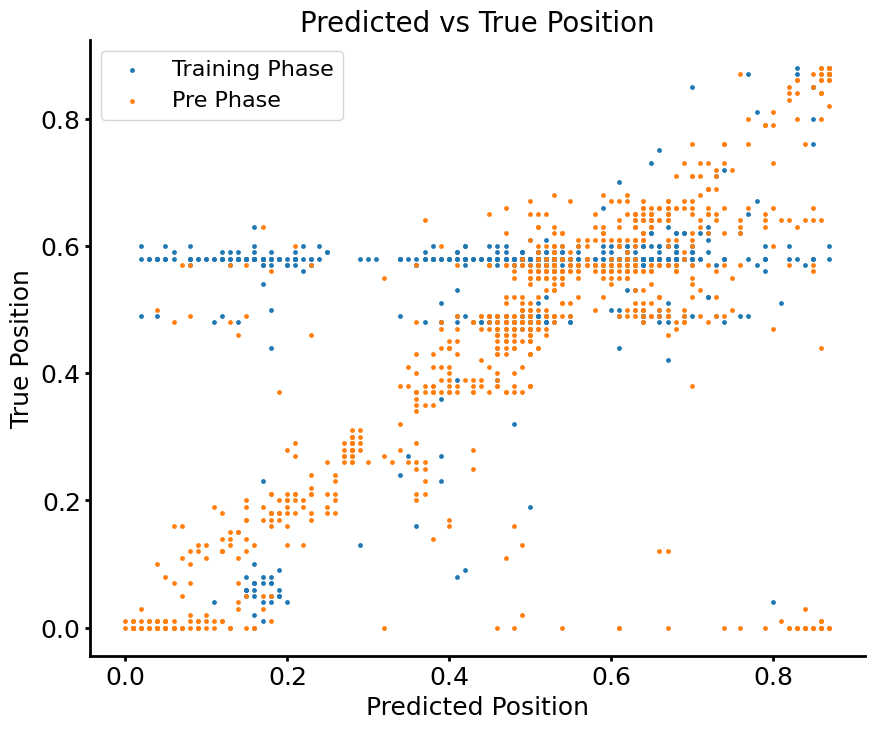

In [ ]:
winms = 1
plt.scatter(training_phase['linPred'][winms], training_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Training Phase')
plt.scatter(pre_phase['linPred'][winms], pre_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Pre Phase')
plt.xlabel('Predicted Position')
plt.ylabel('True Position')
plt.title('Predicted vs True Position')
plt.legend()

/tmp/ipykernel_19885/2566397954.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(training_phase['linPred'][winms], training_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Training Phase')
/tmp/ipykernel_19885/2566397954.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pre_phase['linPred'][winms], pre_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Pre Phase')


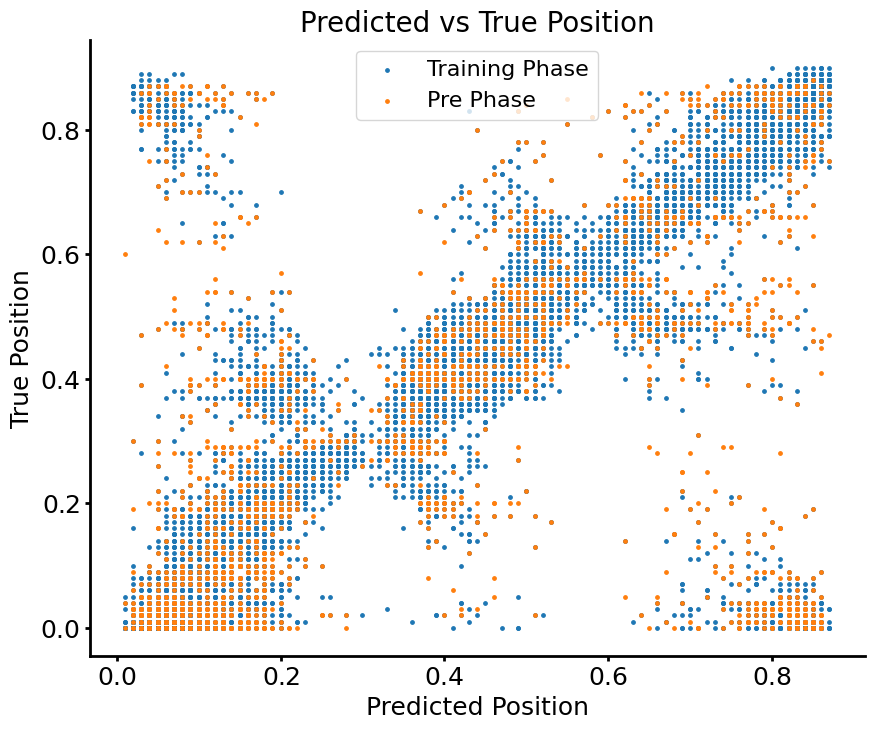

In [ ]:
winms = 0
plt.scatter(training_phase['linPred'][winms], training_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Training Phase')
plt.scatter(pre_phase['linPred'][winms], pre_phase['linTruePos'][winms], s = 6, cmap = 'viridis', label = 'Pre Phase')
plt.xlabel('Predicted Position')
plt.ylabel('True Position')
plt.title('Predicted vs True Position')
plt.legend()

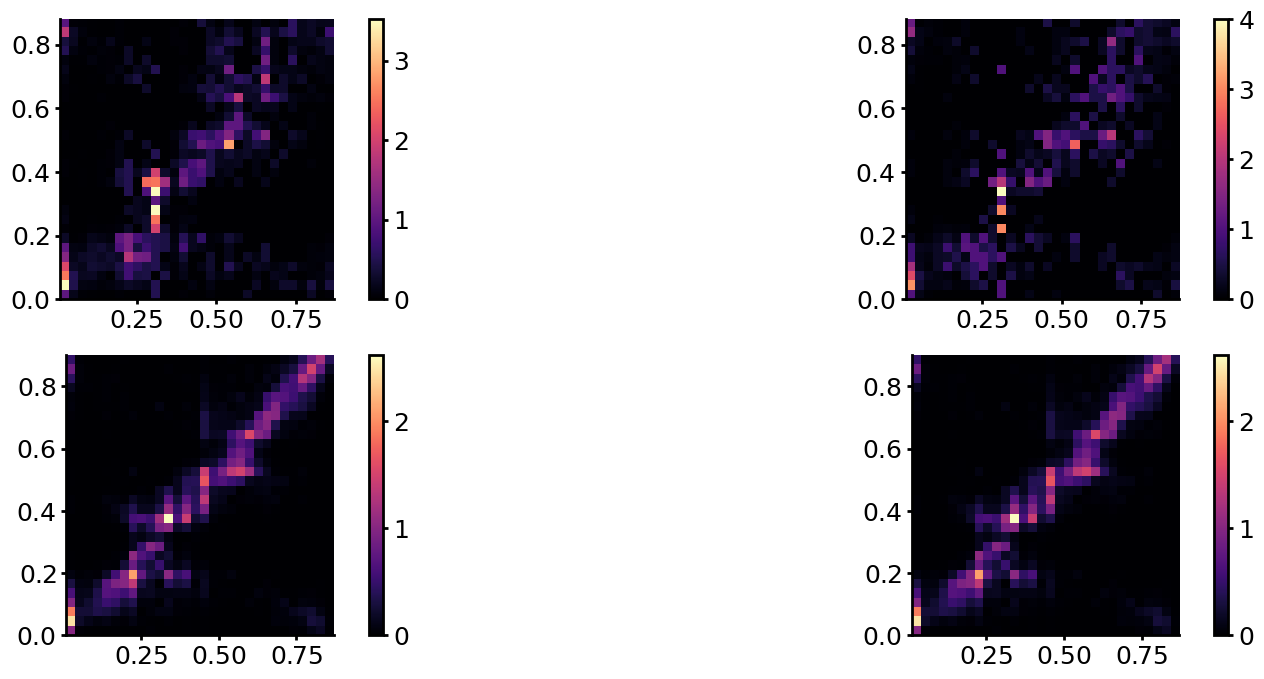

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 8))
axes = axes.flatten()
H, xedges, yedges = np.histogram2d(pre_phase['linPred'][winms], pre_phase['linTruePos'][winms], bins=(nbins, nbins),density=True )
# H_normalized = H/float(az1.shape[0]) # the integral over the histogrm is 1
H_normalized = H/H.max(axis = 1) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[0].imshow(H_normalized, extent=extent, cmap='magma', interpolation='none',origin ='lower')
fig.colorbar(im, ax=axes[0])

H, xedges, yedges = np.histogram2d(pre_phase['linPred'][winms][pre_phase['speedMask'][winms]], pre_phase['linTruePos'][winms][pre_phase['speedMask'][winms]], bins=(nbins, nbins),density=True )
# H_normalized = H/float(az1.shape[0]) # the integral over the histogrm is 1
H_normalized = H/H.max(axis = 1) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[1].imshow(H_normalized, extent=extent, cmap='magma', interpolation='none',origin ='lower')
fig.colorbar(im, ax=axes[1])

H, xedges, yedges = np.histogram2d(training_phase['linPred'][winms], training_phase['linTruePos'][winms], bins=(nbins, nbins),density=True )
# H_normalized = H/float(az1.shape[0]) # the integral over the histogrm is 1
H_normalized = H/H.max(axis = 1) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[2].imshow(H_normalized, extent=extent, cmap='magma', interpolation='none',origin ='lower')
fig.colorbar(im, ax=axes[2])

H, xedges, yedges = np.histogram2d(training_phase['linPred'][winms][training_phase['speedMask'][winms]], training_phase['linTruePos'][winms][training_phase['speedMask'][winms]], bins=(nbins, nbins),density=True )
# H_normalized = H/float(az1.shape[0]) # the integral over the histogrm is 1
H_normalized = H/H.max(axis = 1) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[3].imshow(H_normalized, extent=extent, cmap='magma', interpolation='none',origin ='lower')
fig.colorbar(im, ax=axes[3])

plt.show()

(array([[1.114e+03, 1.480e+02, 3.300e+01, 1.100e+01, 1.000e+01, 6.000e+00,
         0.000e+00, 6.000e+00, 3.500e+01, 1.510e+02],
        [5.040e+02, 4.770e+02, 2.980e+02, 4.100e+01, 1.110e+02, 3.600e+01,
         2.000e+00, 1.600e+01, 1.500e+01, 2.200e+01],
        [4.200e+01, 6.700e+01, 2.850e+02, 1.200e+02, 1.790e+02, 1.700e+01,
         3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00],
        [3.000e+00, 1.000e+00, 4.500e+01, 1.620e+02, 7.700e+01, 5.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.100e+01, 2.100e+01, 9.900e+01, 1.670e+02, 6.200e+02, 2.300e+02,
         4.000e+00, 1.500e+01, 1.000e+00, 1.000e+00],
        [7.000e+00, 2.000e+00, 7.000e+00, 1.200e+01, 2.300e+02, 5.960e+02,
         1.700e+02, 6.700e+01, 1.600e+01, 1.000e+00],
        [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 8.000e+00, 1.240e+02,
         1.940e+02, 4.900e+01, 2.000e+00, 3.000e+00],
        [1.700e+01, 4.000e+00, 2.000e+00, 1.000e+00, 1.300e+01, 1.520e+02,
         1.060e+02, 4.

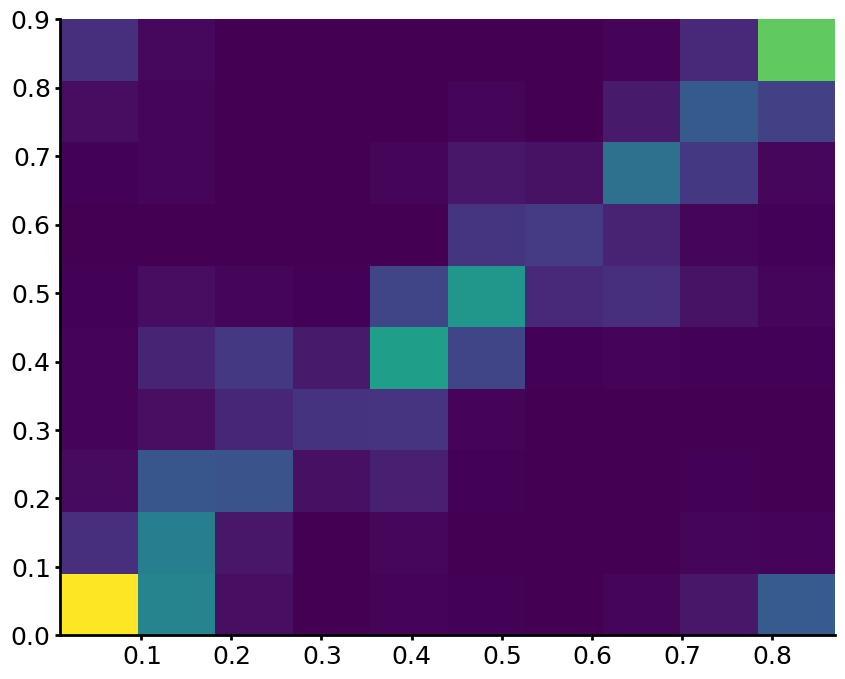

In [ ]:
plt.hist2d(training_phase['linPred'][winms], training_phase['linTruePos'][winms], cmap = 'viridis', label = 'Training Phase')


In [ ]:
training_phase.keys()

dict_keys(['time', 'speedMask', 'linPred', 'fullPred', 'truePos', 'linTruePos', 'predLoss'])

In [ ]:
pre_phase

{'time': [array([11543.901, 11544.05 , 11544.194, ..., 11770.382, 11770.509,
         11770.628], dtype=float32),
  array([11543.81  , 11544.119 , 11544.372 , 11544.645 , 11544.907 ,
         11545.187 , 11545.435 , 11545.742 , 11545.988 , 11546.214 ,
         11546.482 , 11546.719 , 11546.97  , 11547.24  , 11547.489 ,
         11547.747 , 11547.999 , 11548.262 , 11548.471 , 11548.725 ,
         11548.926 , 11549.196 , 11549.467 , 11549.712 , 11549.957 ,
         11550.211 , 11550.475 , 11550.732 , 11550.987 , 11551.239 ,
         11551.485 , 11551.755 , 11552.065 , 11552.283 , 11552.529 ,
         11552.778 , 11553.052 , 11553.3125, 11553.5625, 11553.825 ,
         11554.054 , 11554.31  , 11554.57  , 11554.825 , 11555.058 ,
         11555.375 , 11555.572 , 11555.841 , 11555.98  , 11556.145 ,
         11556.422 , 11556.661 , 11556.9   , 11557.154 , 11557.441 ,
         11557.668 , 11557.921 , 11558.181 , 11558.438 , 11558.677 ,
         11558.937 , 11559.187 , 11559.457 , 11559.686 , 1

In [ ]:
Mouse_Results.load_data(suffix = "_training")

In [ ]:
Mouse_Results.show_results(show = True, phase = "training", save = False)

total windows: 4352 | selected windows: 1306 (thresh -5.974001  ( 30.0 %) )
mean eucl. error: 0.17489829509598256 | selected error: 0.15816015256320765
mean linear error: 0.09654181985294118 | selected error: 0.07896630934150076
threshold value: -5.6030070100000015







In [ ]:
Mouse_Results.resultsNN

{'time': [array([11543.901, 11544.05 , 11544.194, ..., 11770.382, 11770.509,
         11770.628], dtype=float32),
  array([11543.81  , 11544.119 , 11544.372 , 11544.645 , 11544.907 ,
         11545.187 , 11545.435 , 11545.742 , 11545.988 , 11546.214 ,
         11546.482 , 11546.719 , 11546.97  , 11547.24  , 11547.489 ,
         11547.747 , 11547.999 , 11548.262 , 11548.471 , 11548.725 ,
         11548.926 , 11549.196 , 11549.467 , 11549.712 , 11549.957 ,
         11550.211 , 11550.475 , 11550.732 , 11550.987 , 11551.239 ,
         11551.485 , 11551.755 , 11552.065 , 11552.283 , 11552.529 ,
         11552.778 , 11553.052 , 11553.3125, 11553.5625, 11553.825 ,
         11554.054 , 11554.31  , 11554.57  , 11554.825 , 11555.058 ,
         11555.375 , 11555.572 , 11555.841 , 11555.98  , 11556.145 ,
         11556.422 , 11556.661 , 11556.9   , 11557.154 , 11557.441 ,
         11557.668 , 11557.921 , 11558.181 , 11558.438 , 11558.677 ,
         11558.937 , 11559.187 , 11559.457 , 11559.686 , 1

In [ ]:
Mouse_Results.data_helper['108'].phase

'pre'

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.load_data()

In [ ]:
Mouse_Results.resultsNN.keys()

dict_keys(['time', 'speedMask', 'linPred', 'fullPred', 'truePos', 'linTruePos', 'predLoss'])

In [ ]:
x = np.arange(0, 2000)

In [ ]:
%matplotlib inline

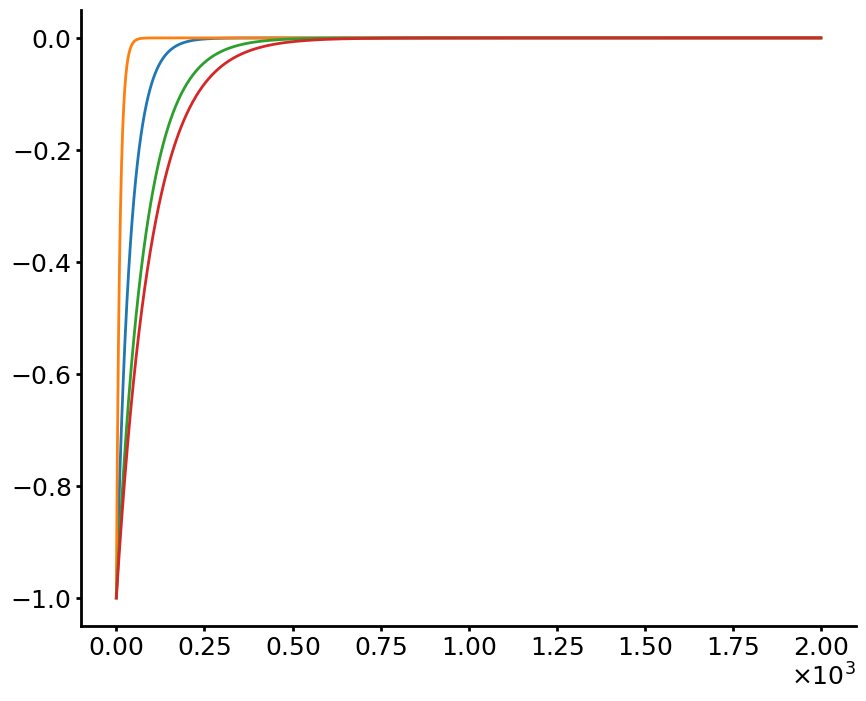

In [ ]:
plt.plot(x, - np.exp(-1/40 * x))
plt.plot(x, - np.exp(-1/10 * x))
plt.plot(x, - np.exp(-1/80 * x))
plt.plot(x, - np.exp(-1/100 * x))

(array([[101.,  26.,  17.,   8.,   5.,   5.,   5.,   4.,   6.,  12.],
        [ 90.,  11.,   3.,  10.,  11.,   5.,   4.,   3.,   6.,   7.],
        [ 36.,  21.,  11.,   4.,   9.,   4.,   4.,   8.,  10.,  16.],
        [  6.,   3.,   2.,   2.,   1.,   1.,   3.,   2.,  12.,  29.],
        [  1.,   2.,   0.,   0.,   1.,   2.,   1.,   3.,   5.,  29.],
        [  5.,   2.,   1.,   2.,   1.,   1.,   3.,   1.,   1.,  35.],
        [  1.,   4.,   2.,   0.,   2.,   1.,   0.,   1.,   2.,  28.],
        [  5.,   3.,   4.,   1.,   1.,   3.,   2.,   4.,   6.,  20.],
        [  6.,   5.,   4.,   3.,   3.,   2.,   7.,   6.,  23.,  38.],
        [  7.,   4.,   5.,   5.,   7.,   9.,  10.,  11.,  25.,   7.]]),
 array([0.07096376, 0.15768314, 0.24440252, 0.3311219 , 0.41784128,
        0.50456066, 0.59128004, 0.67799942, 0.7647188 , 0.85143818,
        0.93815756]),
 array([0.07144762, 0.1598409 , 0.24823418, 0.33662746, 0.42502075,
        0.51341403, 0.60180731, 0.69020059, 0.77859388, 0.86698716,
    

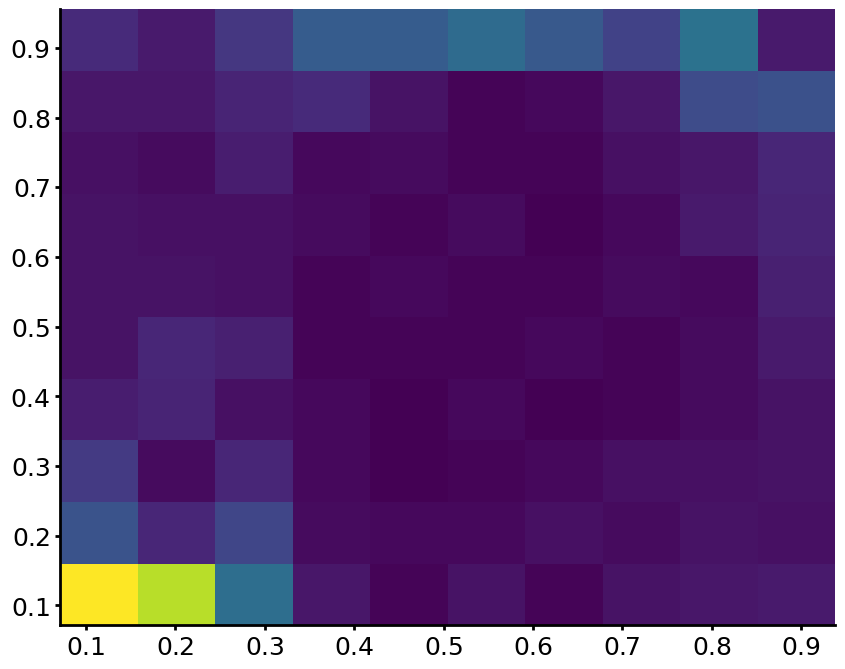

In [ ]:
plt.hist2d(inferring[:,0], inferring[:,1], cmap = 'viridis',)

In [ ]:
Mouse_Results.resultsNN['fullPred']

[array([[0.49783847, 0.28162947],
        [0.3595306 , 0.12322693],
        [0.89382136, 0.35629183],
        ...,
        [0.63871956, 0.93930995],
        [0.5136308 , 0.94125533],
        [0.5114195 , 0.9431033 ]], dtype=float32),
 array([[0.15262586, 0.19201112],
        [0.8625831 , 0.22247645],
        [0.15568405, 0.2127496 ],
        ...,
        [0.8220001 , 0.87367463],
        [0.79118425, 0.9070245 ],
        [0.8497486 , 0.81670433]], dtype=float32)]

In [ ]:
inferring = Mouse_Results.resultsNN['fullPred'][1]
linferring = Mouse_Results.resultsNN['linPred'][1]
pos = Mouse_Results.resultsNN['truePos'][1]
lpos = Mouse_Results.resultsNN['linTruePos'][1]

error = np.array(
        [np.linalg.norm(inferring[i, :] - pos[i, :]) for i in range(inferring.shape[0])]
    )  # eucledian distance


In [ ]:
error_mask = error > 0.6

In [ ]:
np.max(pos, axis = 0)

array([0.95968384, 0.9749033 ], dtype=float32)

In [ ]:
plt.scatter(lpos, linferring)

In [ ]:
plt.hist2d(lpos, linferring, cmap = 'viridis', 
           bins = [np.linspace(0, 1, 20), np.linspace(0, 1, 20)])

(array([[194.,  21.,  14.,  10.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
           2.,   2.,   1.,   1.,   6.,   1.,   0.,   0.],
        [ 24.,   9.,   7.,   2.,   2.,   1.,   0.,   4.,   2.,   0.,   0.,
           0.,   0.,   1.,   1.,   7.,   0.,   0.,   0.],
        [  7.,   3.,   5.,   3.,   2.,   1.,   1.,   4.,   1.,   0.,   0.,
           1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.],
        [ 10.,   4.,   8.,   9.,   1.,   1.,   1.,  15.,  10.,   1.,   0.,
           0.,   4.,   2.,   0.,   2.,   0.,   0.,   0.],
        [  4.,   3.,   1.,   2.,   1.,   2.,   1.,   2.,   1.,   2.,   0.,
           0.,   1.,   3.,   0.,   0.,   0.,   0.,   0.],
        [  2.,   3.,   3.,   3.,   2.,   4.,  11.,  12.,   4.,   0.,   0.,
           1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.],
        [  1.,   0.,   0.,   0.,   1.,   5.,   4.,   7.,   0.,   0.,   0.,
           0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   1.,   2.,   5.,   3.,   2.,   6.,  30.,  26.,   9., 

In [ ]:
plt.plot(linferring)
plt.plot(lpos)

In [ ]:
plt.hist2d(inferring[error_mask, 0], inferring[error_mask, 1], cmap = 'viridis')
plt.colorbar()

In [ ]:
np.where(np.linalg.norm([Mouse_Results.resultsNN['fullPred'][0], Mouse_Results.resultsNN['truePos'][0]]) > 0)[0]

array([0])

In [ ]:
Mouse_Results.resultsNN.keys()

dict_keys(['time', 'speedMask', 'linPred', 'fullPred', 'truePos', 'linTruePos', 'predLoss'])

In [ ]:
Mouse_Results.show_results(phase = "training", save = True)

total windows: 4352 | selected windows: 1306 (thresh -6.8344254  ( 30.0 %) )
mean eucl. error: 0.1538218029934852 | selected error: 0.15605202905514892
mean linear error: 0.07935202205882354 | selected error: 0.07690658499234304
threshold value: -6.2719236789999995







In [ ]:
from importData.gui_elements import AnimatedPositionPlotter

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.resultsNN

{'time': [array([10803.1  , 10803.212, 10803.34 , ..., 13236.435, 13236.562,
         13236.664], dtype=float32),
  array([10803.162, 10803.418, 10803.685, ..., 13252.988, 13253.251,
         13253.504], dtype=float32)],
 'speedMask': [array([ True,  True,  True, ...,  True,  True,  True]),
  array([ True,  True,  True, ...,  True,  True,  True])],
 'linPred': [array([0.06, 0.16, 0.15, ..., 0.06, 0.14, 0.15], dtype=float32),
  array([0.26, 0.08, 0.18, ..., 0.44, 0.46, 0.47], dtype=float32)],
 'fullPred': [array([[0.27328512, 0.25815532],
         [0.18418202, 0.5567734 ],
         [0.37030226, 0.5310284 ],
         ...,
         [0.20023106, 0.25449505],
         [0.13089141, 0.5019691 ],
         [0.16468473, 0.5340357 ]], dtype=float32),
  array([[0.18038416, 0.83670664],
         [0.14013053, 0.31244537],
         [0.21999419, 0.6140781 ],
         ...,
         [0.5243593 , 0.93027717],
         [0.6118036 , 0.9184538 ],
         [0.6342357 , 0.9344529 ]], dtype=float32)],
 'truePo

In [ ]:
nbins = 30
_, edges = np.histogram(Mouse_Results.resultsNN['linTruePos'][winms])

In [ ]:
winms

0

In [ ]:
Mouse_Results.load_data(suffix = "_cond")

In [ ]:
plt.hist(Mouse_Results.resultsNN['predLoss'][winms], density = True, bins = 40)

(array([0.0041391 , 0.0041391 , 0.00827821, 0.02152334, 0.05298054,
        0.12996789, 0.19619356, 0.27814783, 0.39900969, 0.411427  ,
        0.49503691, 0.65480635, 0.8071254 , 0.95778252, 0.97848434,
        0.9851069 , 1.00828589, 0.90398045, 0.8940466 , 0.76325089,
        0.68791919, 0.63576647, 0.49255345, 0.38907584, 0.3245058 ,
        0.2889095 , 0.22433947, 0.18129278, 0.15894162, 0.12831224,
        0.08195427, 0.06043093, 0.05463618, 0.02897364, 0.02400681,
        0.01738424, 0.01324513, 0.00745039, 0.01738424, 0.0041391 ]),
 array([-6.16952515, -6.09692955, -6.02433395, -5.95173836, -5.87914276,
        -5.80654716, -5.73395157, -5.66135597, -5.58876038, -5.51616478,
        -5.44356918, -5.37097359, -5.29837799, -5.22578239, -5.15318632,
        -5.08059072, -5.00799513, -4.93539953, -4.86280394, -4.79020834,
        -4.71761274, -4.64501715, -4.57242155, -4.49982595, -4.42723036,
        -4.35463476, -4.28203917, -4.20944357, -4.13684797, -4.06425238,
        -3.99165

In [ ]:
selection = Mouse_Results.resultsNN['predLoss'][winms] < -5.5

In [ ]:
plotter = AnimatedPositionPlotter(Mouse_Results.data_helper['108'], positions = Mouse_Results.resultsNN['truePos'][winms], 
                                  predicted = Mouse_Results.resultsNN['fullPred'][winms], 
                                  predLossMask = selection,
                                  # speedMaskArray = Mouse_Results.resultsNN['speedMask'][0], 
                                  windowSizeMS = 108, fps = 30, target = target, mouse_name = mouse, manipe = manipe, nameExp = nameExp)

anim = plotter.show(interval=10, repeat=True, block=True, with_ref_bg = False)

/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:405: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  self.predicted_points = None
/home/mickey/Documents/Theotime/neuroEncoders/importData/gui_elements.py:428: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  )


In [ ]:
Mouse_Results.data_helper['108']

====================MM994_PAG=====================
windowSize=0.108
Project(xmlPath=/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/M994_20191013_UMaze_SpikeRef.xml, datPath=M994_20191013_UMaze_SpikeRef.dat, jsonPath=M994_20191013_UMaze_SpikeRef.json, nameExp=position_oldschool_RMSProp_LSTM, folderResult=results)


In [ ]:
Mouse_Results.ann['108'].fix_linearizer(
    Mouse_Results.Linearizer.mazePoints,
    Mouse_Results.Linearizer.tsProj
)

In [ ]:
Mouse_Results.ann['108'].setup_dynamic_dense_loss(
    Mouse_Results.data_helper['108'].fullBehavior, alpha = 1
)

Setting up Dynamic Dense Loss...
Fitting DenseWeight model on full dataset for imbalance analysis...
✓ DenseWeight model fitted on 2107 samples
✓ Ready for dynamic weight computation during training
✓ Dynamic Dense Loss ready!
  3.5 +---------------------------------------------------------------------+
      |                                                                  ***|
      |              weight of linearized position due to imbalance ******* |
    3 |                                                              *****  |
      |                                                            *****    |
      | *                                                       ******      |
  2.5 | *                                                     ******        |
      | **                                          **************          |
      |  *                                        **************            |
    2 |  **                                      *************         

In [ ]:
%matplotlib qt

In [ ]:
print_results.print_results(
    Mouse_Results.ann['108'].folderResult,
    windowSizeMS=108,
    show = True,
    lossSelection = 0.1,
    euclidean = False,
    target = "pos",
    phase = None,
    training_data = Mouse_Results.ann['108'].training_data,
    save = False,
    l_function = Mouse_Results.l_function,
)

total windows: 6528 | selected windows: 301 (thresh -6.512546  ( 10.0 %) )
mean eucl. error: 0.24791512898533571 | selected error: 0.13385867196510096
mean linear error: 0.1297227328431373 | selected error: 0.050664451827242524
threshold value: -6.512546
threshold value: -4.2617185909999998
threshold value: -4.7790082199999995





(0.24791512898533571,
 0.13385867196510096,
 0.1297227328431373,
 0.050664451827242524)

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results

Mouse_Results(mouse_name=1186, manipe=PAG, name_exp=pos_transformer_nostride, target=pos, phase=pre, path=/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1186, windows=['108', '252'])

In [ ]:
%matplotlib inline

In [ ]:
%matplotlib qt

In [ ]:
from importData.epochs_management import inEpochsMask
trainMask = inEpochsMask(Mouse_Results.data_helper['108'].fullBehavior["positionTime"][:, 0], Mouse_Results.data_helper['108'].fullBehavior['Times']['trainEpochs']) 
testMask = inEpochsMask(Mouse_Results.data_helper['108'].fullBehavior["positionTime"][:, 0], Mouse_Results.data_helper['108'].fullBehavior['Times']['testEpochs'])
speedMask = Mouse_Results.data_helper['108'].fullBehavior["Times"]['speedFilter']

mask = (trainMask | testMask) * speedMask

In [ ]:
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][:, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][:, 0], 'o', markersize=1, alpha=0.5, c= 'r')
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][trainMask, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][trainMask, 0], 'o', markersize=1, alpha=1)
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][trainMask, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][trainMask, 1], 'o', markersize=1, alpha=1)

In [ ]:
training_data = Mouse_Results.data_helper['108'].fullBehavior['Positions'][mask]
training_data.shape

(2274, 2)

In [ ]:
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][:, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][:, 0], 'o', markersize=1, alpha=0.3, c= 'r')
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][mask, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][mask, 0], 'o', markersize=1, alpha=1)
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['positionTime'][mask, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][mask, 1], 'o', markersize=1, alpha=1)

In [ ]:
Mouse_Results.show_results(save = False, winMS = 108, phase = 'training', training_data = training_data, lossSelection = 0.1, l_function = Mouse_Results.l_function)

total windows: 43008 | selected windows: 605 (thresh 0.045039415  ( 10.0 %) )
mean eucl. error: 0.47774523588093243 | selected error: 0.2423061029756019
mean linear error: 0.33620047433035716 | selected error: 0.13155371900826446
threshold value: 0.045039415
threshold value: 0.09764070149200016
threshold value: 0.28713313378200006





In [ ]:
Mouse_Results.load_data(suffix = "_pre")

In [ ]:
Mouse_Results.resultsNN

{'time': [array([9356.258, 9356.288, 9356.328, ..., 9536.84 , 9536.868, 9536.924],
        dtype=float32),
  array([9356.191, 9356.27 , 9356.292, ..., 9536.816, 9536.882, 9536.907],
        dtype=float32)],
 'speedMask': [array([False, False, False, ..., False, False, False]),
  array([False, False, False, ..., False, False, False])],
 'linPred': [array([0.15, 0.1 , 0.13, ..., 0.25, 0.25, 0.25], dtype=float32),
  array([0.85, 0.85, 0.85, ..., 0.72, 0.46, 0.71], dtype=float32)],
 'fullPred': [array([[0.29874834, 0.44315812],
         [0.32627898, 0.33228943],
         [0.3753235 , 0.3855866 ],
         ...,
         [0.14756826, 0.75414306],
         [0.1284881 , 0.759364  ],
         [0.12624294, 0.7334921 ]], dtype=float32),
  array([[0.55718076, 0.19779566],
         [0.53822863, 0.17101696],
         [0.56829894, 0.19225812],
         ...,
         [0.5733528 , 0.5681348 ],
         [0.5698561 , 0.6413752 ],
         [0.6162142 , 0.57384956]], dtype=float32)],
 'truePos': [array([[0

In [ ]:
Mouse_Results.test_bayes()

Aligning speed-filter with spike times


100%|██████████| 4/4 [02:45<00:00, 41.47s/it]


Building marginal rate and local rate functions


100%|██████████| 4/4 [00:13<00:00,  3.43s/it]



BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins


{'linPred': [array([0.74, 0.74, 0.74, ..., 0.74, 0.85, 0.85]),
  array([0.74, 0.74, 0.74, ..., 0.85, 0.85, 0.85])],
 'fullPred': [array([[0.60026768, 0.51559173],
         [0.60026768, 0.51559173],
         [0.60026768, 0.51559173],
         ...,
         [0.60026768, 0.51559173],
         [0.98773871, 0.17365911],
         [0.98773871, 0.17365911]]),
  array([[0.60026768, 0.51559173],
         [0.60026768, 0.51559173],
         [0.60026768, 0.51559173],
         ...,
         [0.98773871, 0.17365911],
         [0.98773871, 0.17365911],
         [0.98773871, 0.17365911]])],
 'probaBayes': [array([6.35509646e-57, 2.00476598e-59, 1.29058701e-60, ...,
         2.62348601e-56, 8.31583842e-51, 1.51048572e-54]),
  array([1.96102596e-108, 2.81669709e-112, 3.03060293e-111, ...,
         1.16940110e-103, 3.02100168e-114, 5.24678599e-114])],
 'time': [array([9356.258, 9356.288, 9356.328, ..., 9536.84 , 9536.868, 9536.924],
        dtype=float32),
  array([9356.191, 9356.27 , 9356.292, ..., 9536.

In [ ]:
Mouse_Results.fig_example_XY(108)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

In [ ]:
Mouse_Results.fig_example_linear_filtered(fprop = 0.1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [ ]:
Mouse_Results.compare_nn_bayes(108, isShow=True)

0.5050086035389894

In [ ]:
Mouse_Results.mean_euclerrors()

(array([0.3219071, 0.3096412], dtype=float32),
 array([0.00322717, 0.00348859]),
 array([0.58658366, 0.59014664]),
 array([0.00473944, 0.0048406 ]))

In [ ]:
Mouse_Results.predLoss_vs_trueLoss()

In [ ]:
Mouse_Results.nnVSbayes()

In [ ]:
Mouse_Results.mean_linerrors()

(array([0.15413311, 0.14794399]),
 array([0.00433104, 0.00441126]),
 array([0.36459971, 0.36220339]),
 array([0.00433104, 0.00441126]))

In [ ]:
Mouse_Results.predLoss_linError(speed = 'slow', step = 1e-6)

In [ ]:
Mouse_Results.predLoss_euclError(step = 1e-6, scaled = False)

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


(array([0.04840349, 0.04840368, 0.04840387, 0.04840406, 0.04840425,
        0.04840444, 0.04840463, 0.04840482, 0.048405  , 0.04840519,
        0.04840538, 0.04840557, 0.04840576, 0.04840595, 0.04840614,
        0.04840633, 0.04840651, 0.0484067 , 0.04840689, 0.04840708,
        0.04840727, 0.04840746, 0.04840765, 0.04840784, 0.04840803,
        0.04840821, 0.0484084 , 0.04840859, 0.04840878, 0.04840897,
        0.04840916, 0.04840935, 0.04840954, 0.04840972, 0.04840991,
        0.0484101 , 0.04841029, 0.04841048, 0.04841067, 0.04841086,
        0.04841105, 0.04841124, 0.04841142, 0.04841161, 0.0484118 ,
        0.04841199, 0.04841218, 0.04841237, 0.04841256, 0.04841275,
        0.04841293, 0.04841312, 0.04841331, 0.0484135 , 0.04841369,
        0.04841388, 0.04841407, 0.04841426, 0.04841444, 0.04841463,
        0.04841482, 0.04841501, 0.0484152 , 0.04841539, 0.04841558,
        0.04841577, 0.04841596, 0.04841614, 0.04841633, 0.04841652,
        0.04841671, 0.0484169 , 0.04841709, 0.04

In [ ]:
Mouse_Results.fig_example_2d(speed = 'fast')

In [ ]:
Mouse_Results.hist_linerrors(speed = 'fast')

In [ ]:
Mouse_Results.Params.phase

'pre'

In [ ]:
Mouse_Results.run_spike_alignment(useTrain = False)

In [ ]:
Mouse_Results.plot_pc_tuning_curve_and_predictions(ws = 108)

/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/paper_figures.py:1798: RuntimeWarning: invalid value encountered in divide
  (spikeHist / np.sum(spikePopAligned, axis=1))[spikeMask],
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.DataHelper.fullBehavior["positionTime"]

array([[2.4968500e+00],
       [2.7848500e+00],
       [2.8538500e+00],
       ...,
       [1.9554060e+04],
       [1.9554129e+04],
       [1.9554199e+04]])

In [ ]:
Mouse_Results.load_results(force = True, phase = 'pre')

total windows: 4352 | selected windows: 1306 (thresh 0.048552606  ( 30.0 %) )
mean eucl. error: 0.31697907338818027 | selected error: 0.2676261227606717
mean linear error: 0.15017003676470586 | selected error: 0.12996171516079633
threshold value: 0.048552606






BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 23580 | selected windows: 23580 (thresh 4.240882103477524e-05  ( 30.0 %) )
mean eucl. error: 0.4451398540878244 | selected error: 0.4451398540878244
mean linear error: 0.6799999999999998 | selected error: 0.6799999999999998
threshold value: 4.240882103477524e-05


/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:813: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)







total windows: 4352 | selected windows: 1306 (thresh 0.027002787  ( 30.0 %) )
mean eucl. error: 0.3063088629033337 | selected error: 0.2324129854995247
mean linear error: 0.14555836397058824 | selected error: 0.10771056661562023
threshold value: 0.027002787
threshold value: 0.026876978000000003
threshold value: 0.026876978000000003




BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 23580 | selected windows: 23580 (thresh 4.240882103477524e-05  ( 30.0 %) )
mean eucl. error: 0.4451398540878244 | selected error: 0.4451398540878244
mean linear error: 0.6799999999999998 | selected error: 0.6799999999999998
threshold value: 4.240882103477524e-05


/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:813: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


phase  windowSizeMS  mean_ann  select_ann  mean_lin_ann  select_lin_ann  \
0   pre           108  0.316979    0.267626      0.150170        0.129962   
1   pre           252  0.306309    0.232413      0.145558        0.107711   

   mean_eucl_bayes  select_lin_bayes  mean_lin_bayes  
0          0.44514              0.68            0.68  
1          0.44514              0.68            0.68

In [ ]:
from importData.epochs_management import inEpochs


fig, ax = plt.subplots()

ax1 = plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)

trainMask = inEpochs(Mouse_Results.data_helper["108"].fullBehavior['positionTime'], Mouse_Results.data_helper["108"].fullBehavior['Times']['trainEpochs'])[0]
testMask = inEpochs(Mouse_Results.data_helper["108"].fullBehavior['positionTime'], Mouse_Results.data_helper["108"].fullBehavior['Times']['testEpochs'])[0]

ax1.plot(Mouse_Results.data_helper["108"].fullBehavior['positionTime'][trainMask], Mouse_Results.data_helper["108"].fullBehavior['Positions'][trainMask, 0],'--.', color='black', label='training',markersize = 6)
ax1.plot(Mouse_Results.data_helper["108"].fullBehavior['positionTime'][testMask], Mouse_Results.data_helper["108"].fullBehavior['Positions'][testMask, 0],'--.', color='red', label='testing',markersize = 6)

ax2.plot(Mouse_Results.data_helper["108"].fullBehavior['positionTime'][trainMask], Mouse_Results.data_helper["108"].fullBehavior['Positions'][trainMask, 1],'--.', color='black', label='training',markersize = 6)
ax2.plot(Mouse_Results.data_helper["108"].fullBehavior['positionTime'][testMask], Mouse_Results.data_helper["108"].fullBehavior['Positions'][testMask, 1],'--.', color='red', label='testing',markersize = 6)


/tmp/ipykernel_1266803/2597612017.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)


In [ ]:
print_results.print_results(Mouse_Results.folderResult, show = True, windowSizeMS = 108, phase  = phase, target = target)

total windows: 5632 | selected windows: 1690 (thresh 0.079885945  ( 30.0 %) )
mean eucl. error: 0.4918272679678793 | selected error: 0.5159545074319232
mean linear error: 0.2666690340909091 | selected error: 0.300189349112426
threshold value: 0.079885945
threshold value: 0.141294410960000026
threshold value: 0.208133247859999986

threshold value: 0.09896314759000001
threshold value: 0.12792664358999999


(0.4918272679678793, 0.5159545074319232, 0.2666690340909091, 0.300189349112426)

In [ ]:
Mouse_Results.data_helper["108"].fullBehavior['Times']['SessionEpochs']['pre']

[2.4968500000000016,
 7202.97685,
 7225.69095,
 8126.16795,
 8134.6102,
 8255.128200000001,
 8284.93505,
 8405.47105,
 8433.19245,
 8553.71245,
 8579.198349999999,
 8699.740349999998,
 8723.522850000001,
 8843.995850000001,
 8867.1175,
 8987.6525,
 9018.563800000002,
 9139.044800000001,
 9162.75735,
 9283.26935]

In [ ]:
plt.plot(np.arange(0,1000,1), np.random.rand(1000), label = "test")

In [ ]:
plt.plot(testEpochs[0])
plt.show()

In [ ]:
from importData.epochs_management import inEpochs

testEpochs = inEpochs(Mouse_Results.data_helper['108'].fullBehavior['positionTime'].flatten(), Mouse_Results.data_helper['108'].fullBehavior['Times']['testEpochs'])[0]
plt.plot(Mouse_Results.data_helper['108'].fullBehavior['Positions'][testEpochs, 0], Mouse_Results.data_helper['108'].fullBehavior['Positions'][testEpochs, 1])
plt.show()

In [ ]:
Mouse_Results.projects['108']

====================MM1199_PAG====================
Project(xmlPath=/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/amplifier.xml, datPath=amplifier.dat, jsonPath=amplifier.json, nameExp=LinAndDirection_SpecificLoss, folderResult=results, windowSize=0.108)


In [ ]:
print(Mouse_Results.projects['108'])

====================MM1199_PAG====================
xmlPath=/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/amplifier.xml
datPath=amplifier.dat
jsonPath=amplifier.json
nameExp=LinAndDirection_SpecificLoss
folderResults=results
windowSize=0.108



In [ ]:
Mouse_Results.load_trainers()

myoutputPos = KerasTensor(type_spec=TensorSpec(shape=(256, 2), dtype=tf.float32, name=None), name='feature_output/clip_by_value:0', description="created by layer 'feature_output'")
Using position loss: mse with weight 0.6
Using classification loss: binary_crossentropy with weight 0.4
Reading saved cluster csv file


100%|██████████| 4/4 [00:11<00:00,  2.82s/it]


finished reading
myoutputPos = KerasTensor(type_spec=TensorSpec(shape=(256, 2), dtype=tf.float32, name=None), name='feature_output/clip_by_value:0', description="created by layer 'feature_output'")
Using position loss: mse with weight 0.6
Using classification loss: binary_crossentropy with weight 0.4


({'108': <fullEncoder.an_network.LSTMandSpikeNetwork at 0x70a511f09090>,
  '252': <fullEncoder.an_network.LSTMandSpikeNetwork at 0x70a511f09120>},
 <simpleBayes.decode_bayes.Trainer at 0x70a511f090c0>)

In [ ]:
Mouse_Results.load_results(force = True)

Aligning speed-filter with spike times


  0%|          | 0/4 [00:00<?, ?it/s]

: 

: 

In [ ]:
%matplotlib inline

In [ ]:
NNTrainer = Training.LSTMandSpikeNetwork(
    ProjectPath,
    Parameters[winMS],
    deviceName=deviceName,
    debug=False,
    phase=phase,
)

myoutputPos = KerasTensor(type_spec=TensorSpec(shape=(256, 2), dtype=tf.float32, name=None), name='feature_output/clip_by_value:0', description="created by layer 'feature_output'")


In [ ]:
DataHelper.resultsPath

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/LinAndDirection_NoSpecificLoss/results/108'

In [ ]:
featurePred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"featurePred_{phase}.csv")
).to_numpy()
featureTrue = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"featureTrue_{phase}.csv")
).to_numpy()
lossPred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"lossPred_{phase}.csv")
).to_numpy()
speedMask = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"speedMask_{phase}.csv")
).to_numpy()

linearPred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"linearPred_{phase}.csv")
).to_numpy()
linearTrue = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"linearTrue_{phase}.csv")
).to_numpy()

In [ ]:
featurePred = featurePred[:, -2]
featureTrue = featureTrue[:, -2]
lossPred = lossPred[:, -1]
speedMask = speedMask[:, -1]

In [ ]:
DataHelper.fullBehavior['Times']['testEpochs']

array([13029.12336526, 13035.492     , 13035.5621875 , 13278.06      ])

In [ ]:
from epochs_management import  inEpochs, inEpochsMask

timeStepPred = DataHelper.fullBehavior['positionTime'][inEpochs(DataHelper.fullBehavior['positionTime'][:,0], DataHelper.fullBehavior['Times']['testEpochs'])]

In [ ]:
timeStepPred

array([[13029.12336526],
       [13029.19335026],
       [13029.26333526],
       ...,
       [13277.919625  ],
       [13277.9898125 ],
       [13278.06      ]])

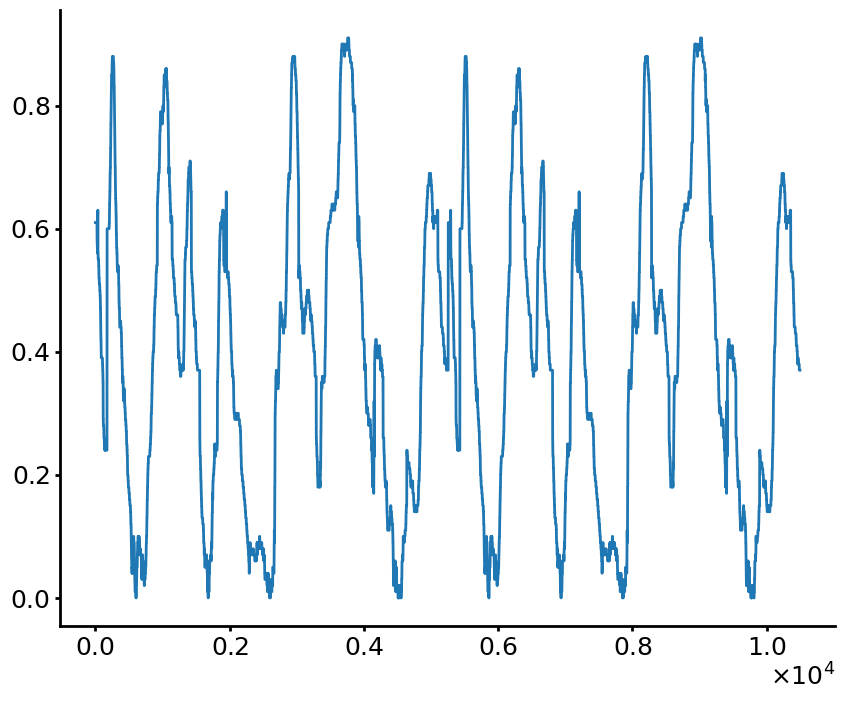

In [ ]:
plt.plot(featureTrue)

In [ ]:
reload(print_results)
print_results.print_results(

In [ ]:
qControltmp = lossPred.copy()
temp = lossPred.argsort(axis=0)

In [ ]:
thresh = np.squeeze(qControltmp[temp[int(len(temp) * 0.5)]])

In [ ]:
np.quantile(lossPred, 0.5)

0.010262342

In [ ]:
selection = np.squeeze(qControltmp < thresh)

In [ ]:
inferring = featurePred
pos = featureTrue

In [ ]:
selection

array([False, False, False, ..., False, False, False])

In [ ]:
temp

array([    0,  8357,  8358, ...,  4186,  4188, 12543])

In [ ]:
%matplotlib inline

In [ ]:
lossPred

array([0.01026234, 0.01026234, 0.01026234, ..., 0.01026234, 0.01026234,
       0.01026234])

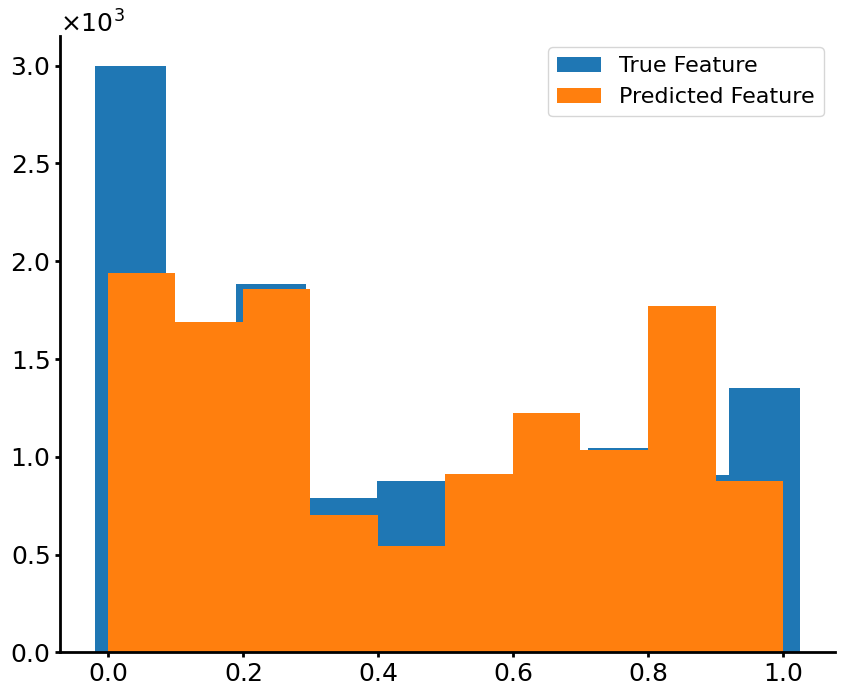

In [ ]:
plt.hist(featureTrue, label ="True Feature")
plt.hist(featurePred, label="Predicted Feature")
plt.legend()

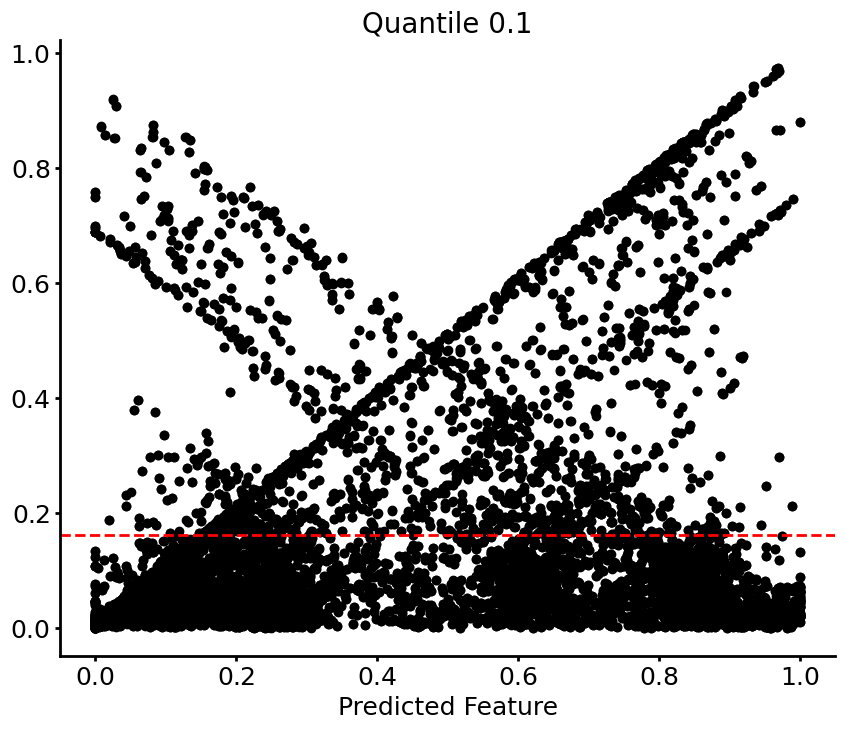

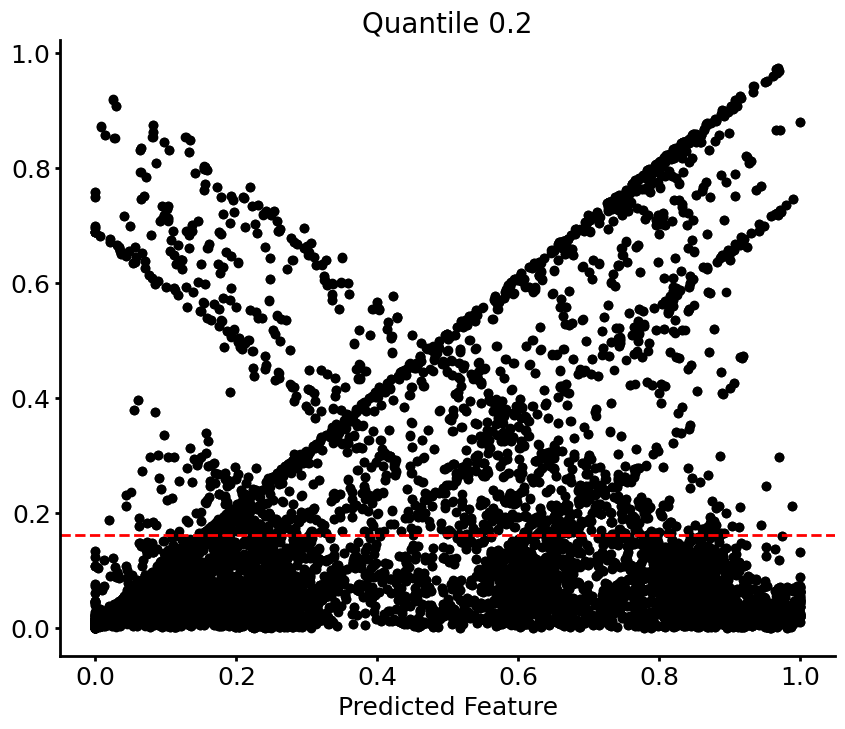

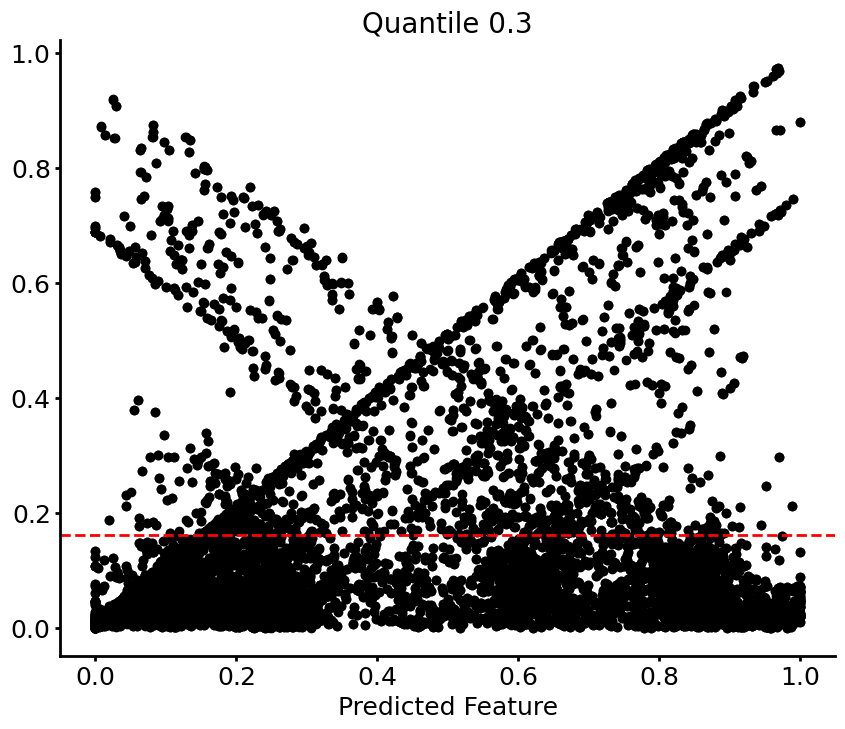

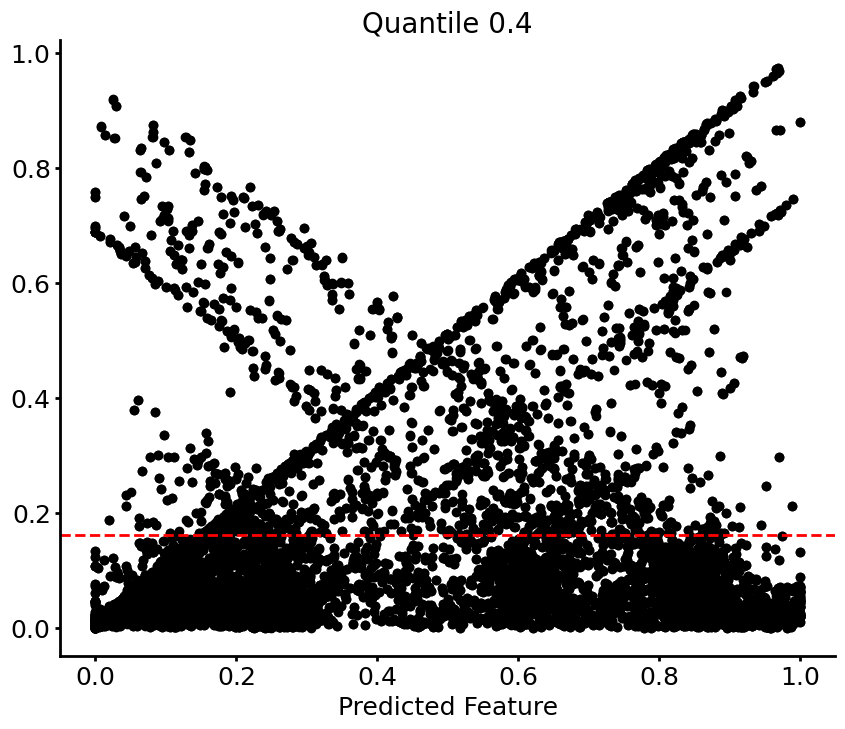

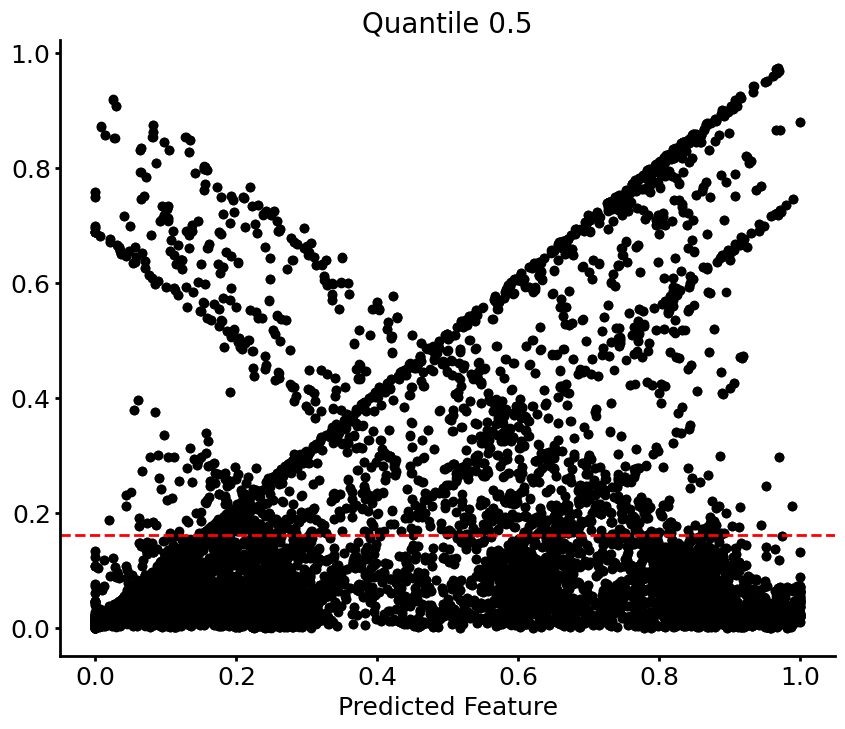

In [ ]:
for quantile in [0.1, 0.2, 0.3, 0.4, 0.5]:
    qControl = np.quantile(lossPred, quantile)
    plt.figure()
    plt.title(f"Quantile {quantile}")
    plt.plot(
        featurePred[lossPred <= qControl],
        np.abs(featureTrue[lossPred <= qControl] - featurePred[lossPred <= qControl]),
        "k.",
    )
    mean_error = np.mean(
        np.abs(featureTrue[lossPred <= qControl] - featurePred[lossPred <= qControl])
    )
    plt.axhline(
        mean_error, color="r", linestyle="--", label=f"Mean Error: {mean_error:.2f}"
    )
    plt.xlabel("Predicted Feature")

In [ ]:
DataHelper.globalResultsPath

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/PositionSpecificLoss'

total windows: 12544 | selected windows: 12544 (thresh 0.010262342  ( 50.0 %) )
mean eucl. error: 0.23107729294459875 | selected error: 0.23107729294459875
mean linear error: 0.12162946428571429 | selected error: 0.12162946428571429


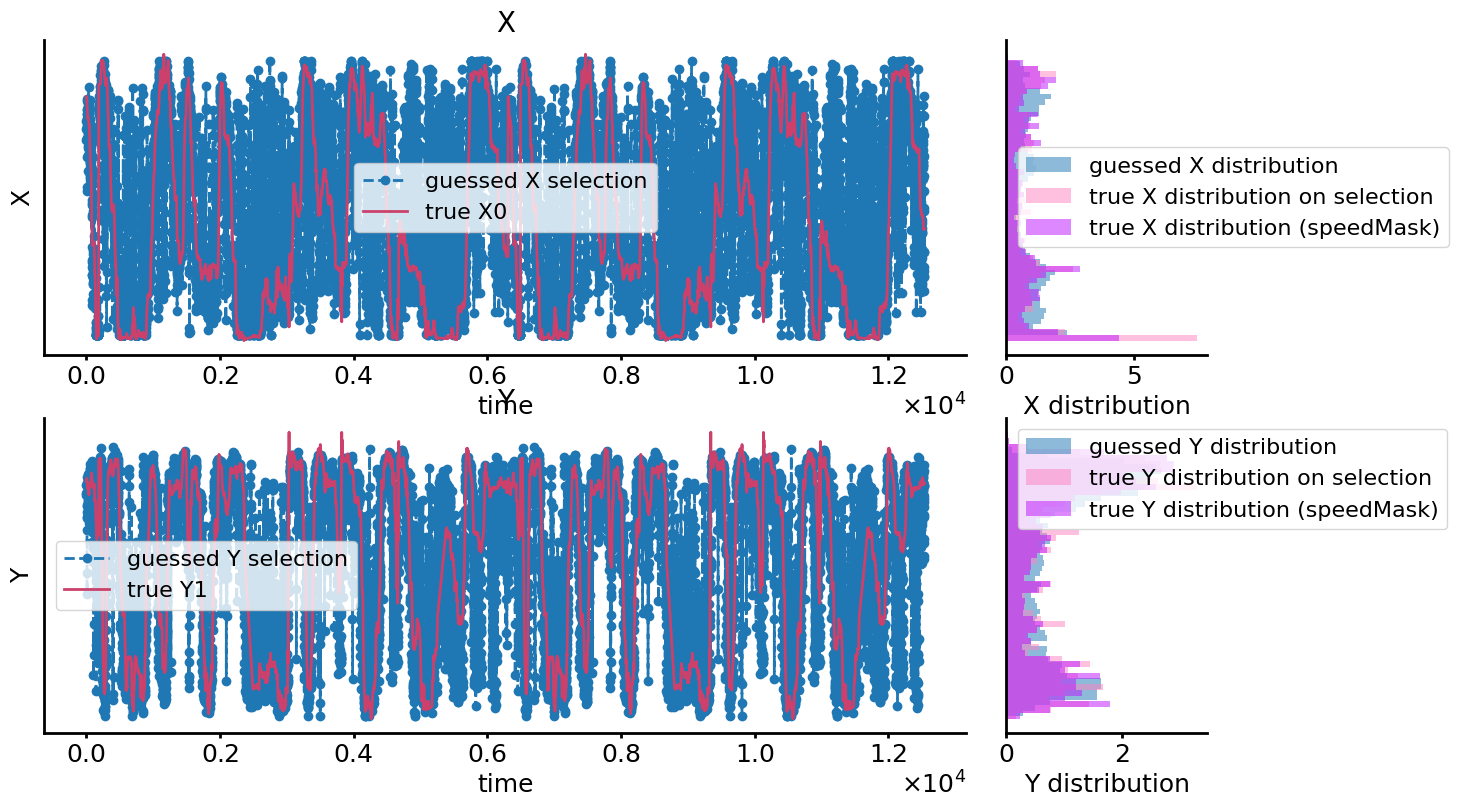

/home/mickey/Documents/Theotime/neuroEncoders/resultAnalysis/print_results.py:701: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(


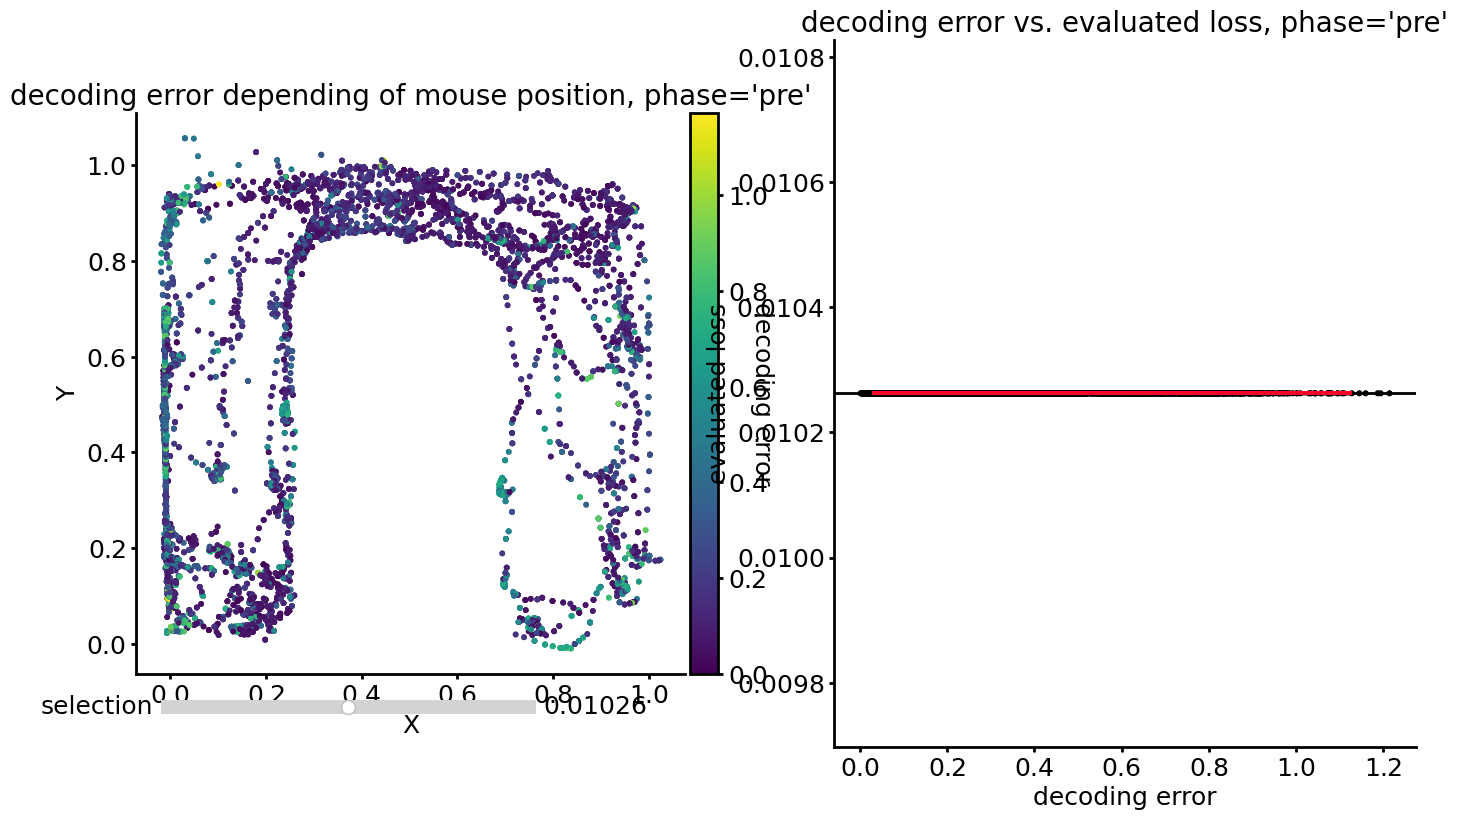

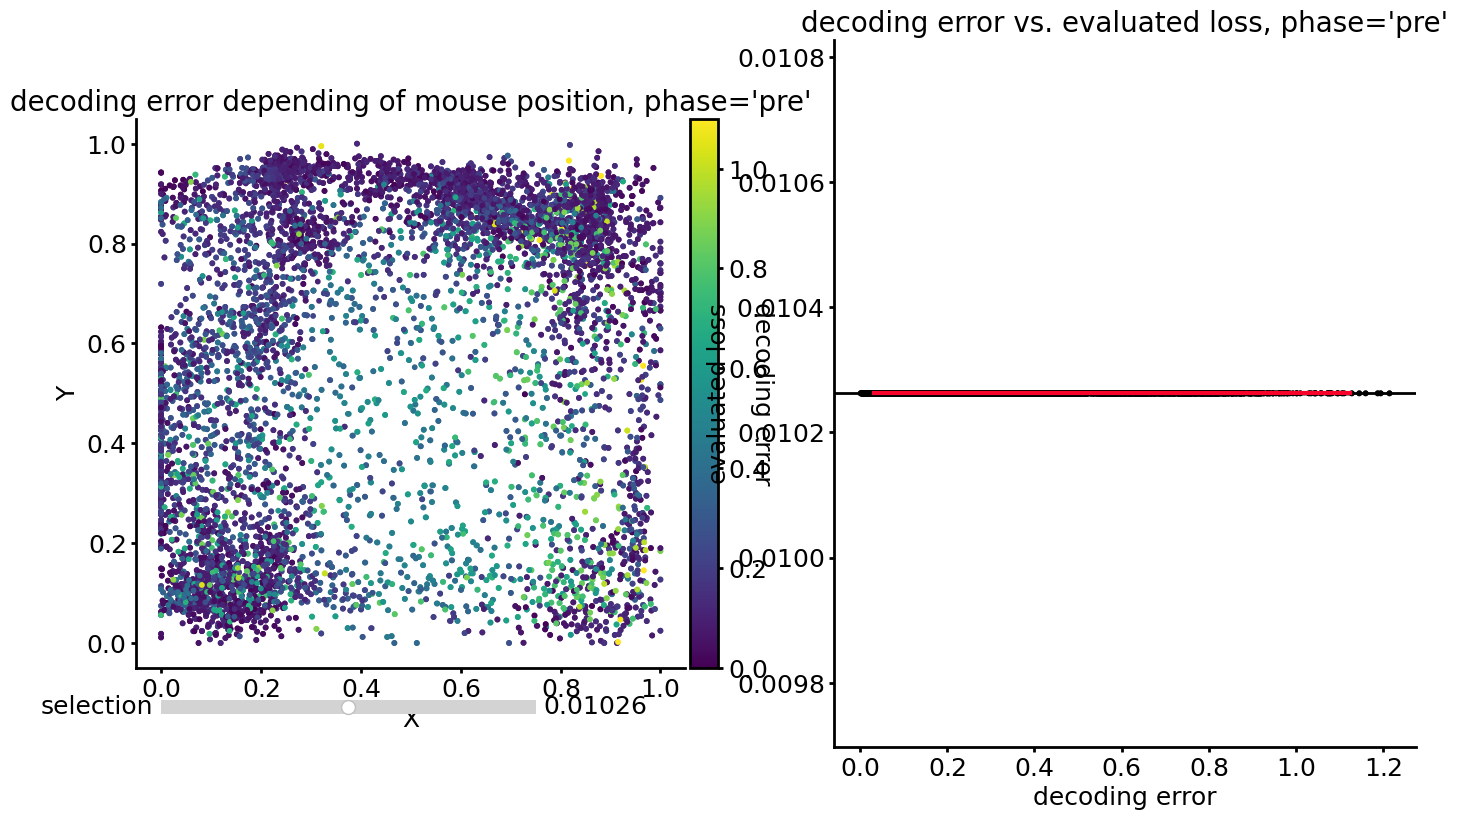

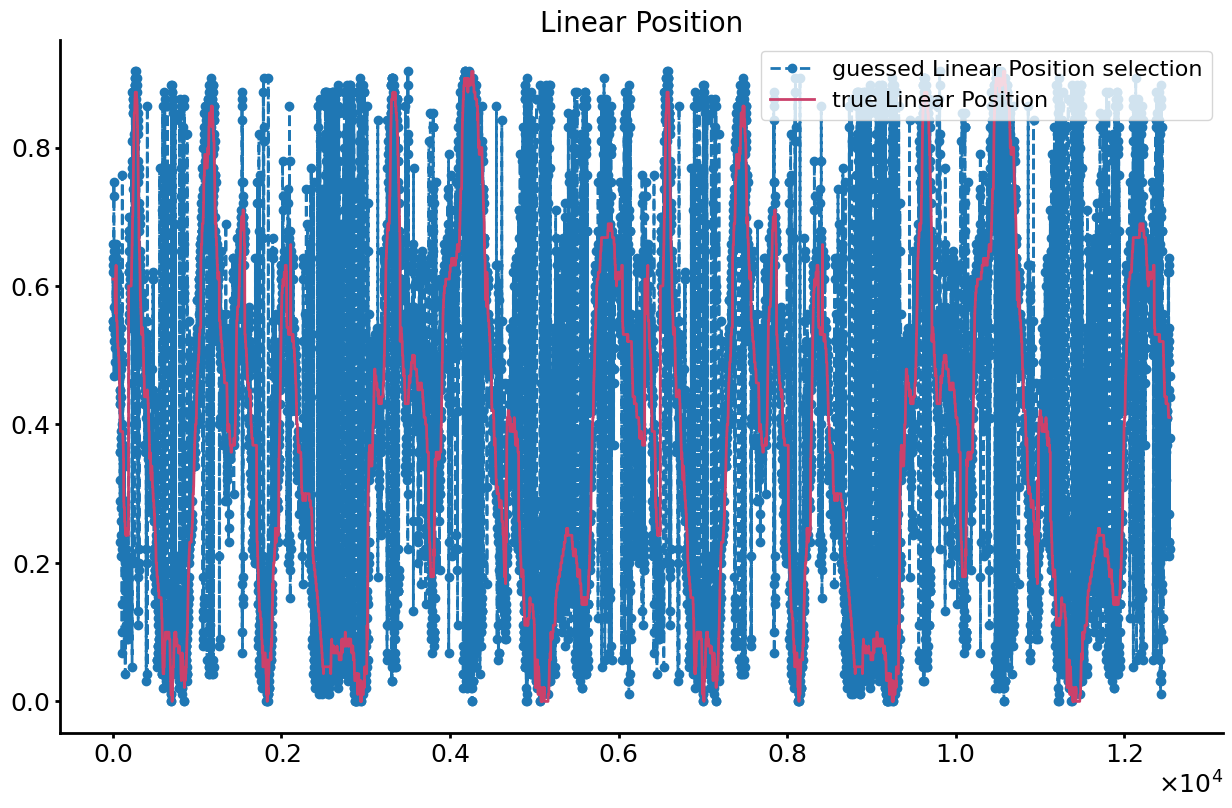

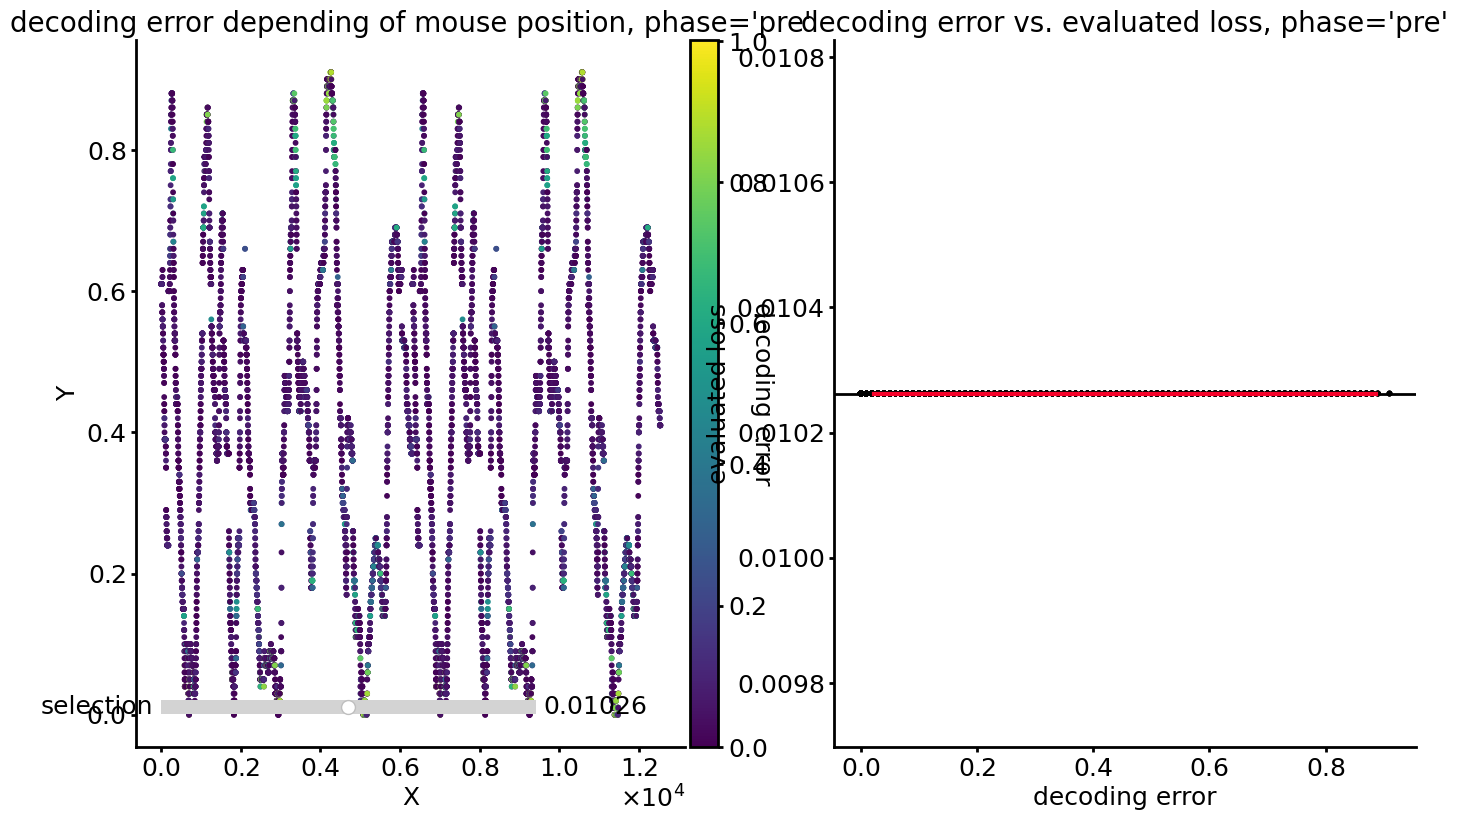

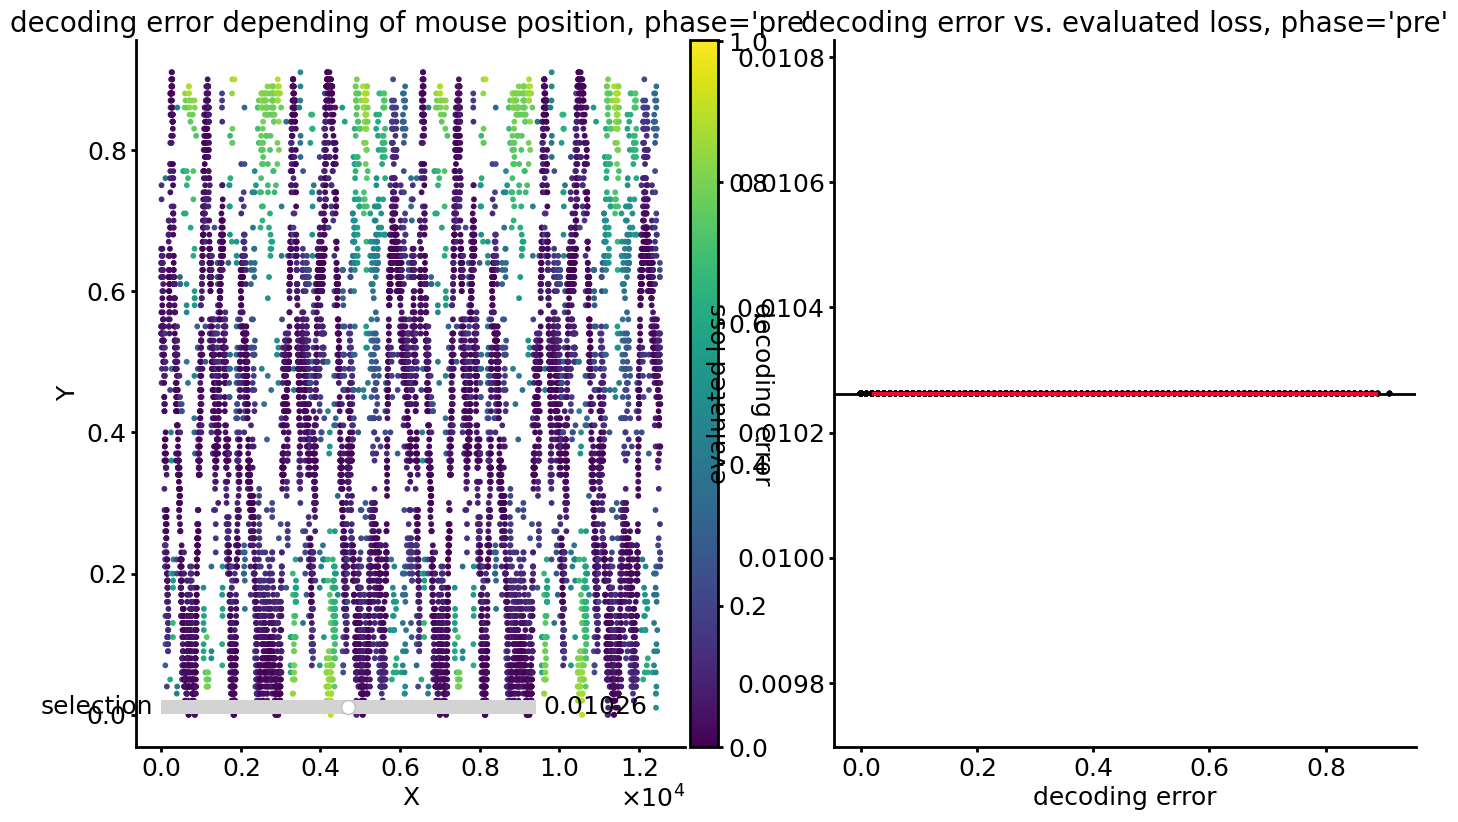

(0.23107729294459875,
 0.23107729294459875,
 0.12162946428571429,
 0.12162946428571429)

In [ ]:
reload(print_results)
print_results.print_results(
    NNTrainer.folderResult,
    windowSizeMS=108,
    lossSelection=0.5,
    target="pos",
    phase=phase
)

## waveform comparator

In [ ]:
from importData.compareSpikeFiltering import WaveFormComparator

In [ ]:
Mouse_Results.run_spike_alignment(force = True)

43975it [00:02, 17238.40it/s]
3270412it [00:04, 718713.58it/s] 
43975it [00:04, 9069.29it/s]
3270412it [00:04, 728767.49it/s] 


In [ ]:
waveform = WaveFormComparator(Mouse_Results.Project, Mouse_Results.Params, Mouse_Results.DataHelper.fullBehavior, windowSizeMS = Mouse_Results.windowSizeMS, useTrain = True)

In [ ]:
waveform.save_alignment_tools(Mouse_Results.bayes, Mouse_Results.l_function, windowSizeMS = Mouse_Results.windowSizeMS)

43975it [00:02, 17630.63it/s]
3270412it [00:04, 758673.21it/s] 


## temp

In [ ]:
projectPath = Project(os.path.join(Dir[(Dir['name'].str.contains(mouse)) & (Dir['manipe'].str.contains(manipe))].path.values[0], 'amplifier.xml'), nameExp = nameExp, windowSize = 0.108)

In [ ]:
projectPath.experimentPath

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/BONJOURPositionSpecificLoss'

In [ ]:
windowSizeMS

[108, 252]

In [ ]:
DataHelper = DataHelperClass(projectPath.xml, windowSize=0.108, mode=mode, target=target, phase=phase, nameExp=nameExp)

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


In [ ]:
DataHelper.folderResult

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/BONJOURPositionSpecificLoss/results'

In [ ]:
Linearizer = UMazeLinearizer(projectPath.folder,phase=phase)

In [ ]:
%matplotlib qt

In [ ]:
Linearizer.verify_linearization(DataHelper.positions / DataHelper.maxPos(), projectPath.folder, overwrite=False)

Linearization points have been created before


In [ ]:
l_function = Linearizer.pykeops_linearization

In [ ]:
DataHelper.get_true_target(l_function, in_place=True, show = True)

array([[       nan,        nan],
       [       nan,        nan],
       [       nan,        nan],
       ...,
       [0.04947788, 0.03008337],
       [0.0470803 , 0.03043734],
       [0.04325439, 0.03125013]])

In [ ]:
windowSizeMS

[108, 252]

In [ ]:
Parameters = Params(helper = DataHelper, windowSize = 0.108, nEpochs = nEpochs, phase = phase, batchSize = 256, save_json = True)

In [ ]:
Parameters.folderResult

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/BONJOURPositionSpecificLoss/results'

In [ ]:
Parameters.resultsPath

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/BONJOURPositionSpecificLoss/results/108'

In [ ]:
save_project_to_pickle(projectPath)

In [ ]:
save_project_to_pickle(Parameters, output = os.path.join(Parameters.resultsPath, 'Parameters.pkl'))